# Team 1 Final Project Data_602

# Title: Predictive Modeling of Respiratory Virus Hospitalization Trends: USA

In [1]:
# Importing Basic Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
# Reading data for analysis
df = pd.read_csv('COVID_HOSPITALIZATION_B.csv')
df

jurisdiction collection_date  number_hospitals_reporting_today  \
0               AZ        8/1/2020                                55   
1               AZ        8/2/2020                                76   
2               AZ        8/3/2020                                82   
3               AZ        8/4/2020                                81   
4               AZ        8/5/2020                                84   
...            ...             ...                               ...   
20006           WY        6/3/2022                                28   
20007           WY        6/4/2022                                28   
20008           WY        6/5/2022                                28   
20009           WY        6/6/2022                                27   
20010           WY        6/7/2022                                28   

       total_hospitals  admissions_all_covid_confirmed  \
0                   95                              95   
1                   95                             124   
2                   95                             100   
3                   95                             121   
4                   95                             120   
...                ...                             ...   
20006               28                               6   
20007               28                               4   
20008               28                               3   
20009               28                               6   
20010               28                               5   

       admissions_70_covid_confirmed  admissions_30_49_covid_confirmed  \
0                                 26                                16   
1                                 29                                24   
2                                 26                                21   
3                                 32                                23   
4                                 27                                28   
...                              ...                               ...   
20006                              4                                 1   
20007                              1                                 0   
20008                              1                                 1   
20009                              5                                 0   
20010                              3                                 0   

       admissions_50_69_covid_confirmed  admissions_50_59_covid_confirmed  \
0                                    35                              16.0   
1                                    34                              12.0   
2                                    28                              14.0   
3                                    32                              12.0   
4                                    35                              14.0   
...                                 ...                               ...   
20006                                 1                               1.0   
20007                                 2                               2.0   
20008                                 1                               0.0   
20009                                 1                               1.0   
20010                                 2                               2.0   

       admissions_30_39_covid_confirmed  ...  \
0                                     6  ...   
1                                     8  ...   
2                                    13  ...   
3                                    12  ...   
4                                    14  ...   
...                                 ...  ...   
20006                                 0  ...   
20007                                 0  ...   
20008                                 1  ...   
20009                                 0  ...   
20010                                 0  ...   

       absolute_change_average_percent_staff_pediatri

# Determining the Basic Information of Dataframe

In [3]:
# Shape of the data
df.shape

(20011, 115)

In [4]:
# All the column names
df.columns

Index(['jurisdiction', 'collection_date', 'number_hospitals_reporting_today',
       'total_hospitals', 'admissions_all_covid_confirmed',
       'admissions_70_covid_confirmed', 'admissions_30_49_covid_confirmed',
       'admissions_50_69_covid_confirmed', 'admissions_50_59_covid_confirmed',
       'admissions_30_39_covid_confirmed',
       ...
       'absolute_change_average_percent_staff_pediatric_icu_beds_occupied',
       'admissions_00_04_covid_confirmed', 'admissions_05_11_covid_confirmed',
       'admissions_12_17_covid_confirmed',
       'average_admissions_00_04_covid_confirmed',
       'average_admissions_05_11_covid_confirmed',
       'average_admissions_12_17_covid_confirmed',
       'average_admissions_00_04_covid_confirmed_per_100k',
       'average_admissions_05_11_covid_confirmed_per_100k',
       'average_admissions_12_17_covid_confirmed_per_100k'],
      dtype='object', length=115)

In [5]:
# Using df.info to check the info of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20011 entries, 0 to 20010
Columns: 115 entries, jurisdiction to average_admissions_12_17_covid_confirmed_per_100k
dtypes: float64(89), int64(24), object(2)
memory usage: 17.6+ MB


In [6]:
df.describe()

number_hospitals_reporting_today  total_hospitals  \
count                      20011.000000     20011.000000   
mean                         105.963020       110.643896   
std                          105.686287       109.050298   
min                            8.000000        11.000000   
25%                           43.000000        48.000000   
50%                           84.000000        95.000000   
75%                          136.000000       150.000000   
max                          473.000000       476.000000   

       admissions_all_covid_confirmed  admissions_70_covid_confirmed  \
count                    20011.000000                   20011.000000   
mean                        93.664734                      40.035231   
std                        117.719553                      49.838694   
min                          0.000000                       0.000000   
25%                         20.000000                       8.000000   
50%                         52.000000                      23.000000   
75%                        121.000000                      52.000000   
max                        984.000000                     489.000000   

       admissions_30_49_covid_confirmed  admissions_50_69_covid_confirmed  \
count                      20011.000000                      20011.000000   
mean                          13.345660                         29.933587   
std                           18.664151                         40.641688   
min                            0.000000                          0.000000   
25%                            2.000000                          5.000000   
50%                            6.000000                         15.000000   
75%                           17.000000                         37.000000   
max                          169.000000                        335.000000   

       admissions_50_59_covid_confirmed  admissions_30_39_covid_confirmed  \
count                      20008.000000                      20011.000000   
mean                          12.191224                          6.163760   
std                           17.513354                          8.773912   
min                            0.000000                          0.000000   
25%                            2.000000                          1.000000   
50%                            6.000000                          3.000000   
75%                           14.000000                          8.000000   
max                          137.000000                        105.000000   

       admissions_40_49_covid_confirmed  admissions_18_29_covid_confirmed  \
count                      20009.000000                      20011.000000   
mean                           7.182618                          4.758083   
std                           10.404659                          7.057145   
min                            0.000000                          0.000000   
25%                            1.000000                          1.000000   
50%                            3.000000                          2.000000   
75%                            9.000000                          6.000000   
max                           92.000000                         91.000000   

       ...  absolute_change_average_percent_staff_pediatric_icu_beds_occupied  \
count  ...                                       17509.000000                   
mean   ...                                           0.045048                   
std    ...                                           7.350274                   
min    ...                                        -101.386503                   
25%    ...                                          -2.317593                   
50%    ...                                           0.058179                   
75%    ...                                           2.383522                   
max    ...                                         113.206116                   

     

In [7]:
# Finding columns which have do not have numbers
df.select_dtypes(include=['object']).columns.tolist()

['jurisdiction', 'collection_date']

In [8]:
# Finding columns which have numbers
df.select_dtypes(exclude=['object']).columns.tolist()

['number_hospitals_reporting_today',
 'total_hospitals',
 'admissions_all_covid_confirmed',
 'admissions_70_covid_confirmed',
 'admissions_30_49_covid_confirmed',
 'admissions_50_69_covid_confirmed',
 'admissions_50_59_covid_confirmed',
 'admissions_30_39_covid_confirmed',
 'admissions_40_49_covid_confirmed',
 'admissions_18_29_covid_confirmed',
 'admissions_20_29_covid_confirmed',
 'admissions_0_17_covid_confirmed',
 'average_admissions_all_covid_confirmed',
 'average_admissions_18_29_covid_confirmed',
 'average_admissions_40_49_covid_confirmed',
 'average_admissions_60_69_covid_confirmed',
 'average_admissions_30_39_covid_confirmed',
 'average_admissions_30_49_covid_confirmed',
 'average_admissions_50_69_covid_confirmed',
 'average_admissions_20_29_covid_confirmed',
 'average_admissions_0_17_covid_confirmed',
 'average_admissions_70_covid_confirmed',
 'average_admissions_50_59_covid_confirmed',
 'admissions_60_69_covid_confirmed',
 'average_admissions_60_69_covid_confirmed_per_100k',

In [9]:
# Duplicate rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [jurisdiction, collection_date, number_hospitals_reporting_today, total_hospitals, admissions_all_covid_confirmed, admissions_70_covid_confirmed, admissions_30_49_covid_confirmed, admissions_50_69_covid_confirmed, admissions_50_59_covid_confirmed, admissions_30_39_covid_confirmed, admissions_40_49_covid_confirmed, admissions_18_29_covid_confirmed, admissions_20_29_covid_confirmed, admissions_0_17_covid_confirmed, average_admissions_all_covid_confirmed, average_admissions_18_29_covid_confirmed, average_admissions_40_49_covid_confirmed, average_admissions_60_69_covid_confirmed, average_admissions_30_39_covid_confirmed, average_admissions_30_49_covid_confirmed, average_admissions_50_69_covid_confirmed, average_admissions_20_29_covid_confirmed, average_admissions_0_17_covid_confirmed, average_admissions_70_covid_confirmed, average_admissions_50_59_covid_confirmed, admissions_60_69_covid_confirmed, average_admissions_60_69_covid_confirmed_per_100k, average_admission

# Handling the missing values

In [10]:
import pandas as pd
import numpy as np

# Calculate the missing value percentage for each column
missing_values_percentage = df.isnull().mean() * 100

# Identify columns with more than 5% missing values
columns_to_remove = missing_values_percentage[missing_values_percentage > 5].index.tolist()

# Remove columns with more than 5% missing values
df_cleaned = df.drop(columns=columns_to_remove)

# Convert data types and handle missing values for the remaining columns
# Convert 'collection_date' from object to datetime type
df_cleaned['collection_date'] = pd.to_datetime(df_cleaned['collection_date'])

# Handling missing values for numerical columns by filling with median
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    df_cleaned[column] = df_cleaned[column].fillna(df_cleaned[column].median())

# Assign the cleaned DataFrame to df_reduced
df_reduced = df_cleaned

# Display basic information about the reduced dataset after removing columns with more than 5% missing values
print("Reduced DataFrame:")
df_reduced.info()

# Display the cleaned and reduced DataFrame
df_reduced


Reduced DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20011 entries, 0 to 20010
Data columns (total 83 columns):
 #   Column                                                                   Non-Null Count  Dtype         
---  ------                                                                   --------------  -----         
 0   jurisdiction                                                             20011 non-null  object        
 1   collection_date                                                          20011 non-null  datetime64[ns]
 2   number_hospitals_reporting_today                                         20011 non-null  int64         
 3   total_hospitals                                                          20011 non-null  int64         
 4   admissions_all_covid_confirmed                                           20011 non-null  int64         
 5   admissions_70_covid_confirmed                                            20011 non-null  int64         


jurisdiction collection_date  number_hospitals_reporting_today  \
0               AZ      2020-08-01                                55   
1               AZ      2020-08-02                                76   
2               AZ      2020-08-03                                82   
3               AZ      2020-08-04                                81   
4               AZ      2020-08-05                                84   
...            ...             ...                               ...   
20006           WY      2022-06-03                                28   
20007           WY      2022-06-04                                28   
20008           WY      2022-06-05                                28   
20009           WY      2022-06-06                                27   
20010           WY      2022-06-07                                28   

       total_hospitals  admissions_all_covid_confirmed  \
0                   95                              95   
1                   95                             124   
2                   95                             100   
3                   95                             121   
4                   95                             120   
...                ...                             ...   
20006               28                               6   
20007               28                               4   
20008               28                               3   
20009               28                               6   
20010               28                               5   

       admissions_70_covid_confirmed  admissions_30_49_covid_confirmed  \
0                                 26                                16   
1                                 29                                24   
2                                 26                                21   
3                                 32                                23   
4                                 27                                28   
...                              ...                               ...   
20006                              4                                 1   
20007                              1                                 0   
20008                              1                                 1   
20009                              5                                 0   
20010                              3                                 0   

       admissions_50_69_covid_confirmed  admissions_50_59_covid_confirmed  \
0                                    35                              16.0   
1                                    34                              12.0   
2                                    28                              14.0   
3                                    32                              12.0   
4                                    35                              14.0   
...                                 ...                               ...   
20006                                 1                               1.0   
20007                                 2                               2.0   
20008                                 1                               0.0   
20009                                 1                               1.0   
20010                                 2                               2.0   

       admissions_30_39_covid_confirmed  ...  \
0                                     6  ...   
1                                     8  ...   
2                                    13  ...   
3                                    12  ...   
4                                    14  ...   
...                                 ...  ...   
20006                                 0  ...   
20007                                 0  ...   
20008                                 1  ...   
20009                                 0  ...   
20010                                 0  ...   

       total_patients_hospitalized_influenza_confirme

In [11]:
df_reduced['jurisdiction_code'], unique_jurisdictions = pd.factorize(df_reduced['jurisdiction'])
df_reduced['jurisdiction'] = df_reduced['jurisdiction_code'].astype(float)  # Ensure the main column is numeric
# Create a mapping from codes to original jurisdiction names
jurisdiction_mapping = dict(enumerate(unique_jurisdictions))

# Check the data types of columns in the DataFrame
print(df_reduced.dtypes)

jurisdiction                                                            float64
collection_date                                                  datetime64[ns]
number_hospitals_reporting_today                                          int64
total_hospitals                                                           int64
admissions_all_covid_confirmed                                            int64
                                                                      ...      
average_percent_staff_icu_beds_influenza                                float64
absolute_change_average_percent_staff_icu_beds_influenza                float64
absolute_change_average_percent_adult_inpatient_beds_occupied           float64
absolute_change_average_percent_staff_adult_icu_beds_occupied           float64
jurisdiction_code                                                         int64
Length: 84, dtype: object


In [12]:
# Display the mapping of jurisdiction codes to their assigned strings for reference
print("Jurisdiction Mapping:")
for code, jurisdiction in jurisdiction_mapping.items():
    print(f"{code}: {jurisdiction}")

Jurisdiction Mapping:
0: AZ
1: DC
2: KY
3: LA
4: MI
5: MN
6: NH
7: NJ
8: NV
9: OR
10: RI
11: Region 1
12: Region 7
13: SC
14: VA
15: WY


This code preprocesses the data by converting data types and handling missing values, and then checks the resulting data types of the columns.

In [13]:
# Check the data types of all columns in the DataFrame
print(df_reduced.dtypes)

# Select columns with non-numeric data types (e.g., object, string)
non_numeric_columns = df_reduced.select_dtypes(exclude=['float64', 'int64']).columns

# Display the non-numeric columns
print("Columns with non-numeric data types:")
print(non_numeric_columns)

# Check for non-numeric values in the non-numeric columns
for column in non_numeric_columns:
    unique_values = df_reduced[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")


jurisdiction                                                            float64
collection_date                                                  datetime64[ns]
number_hospitals_reporting_today                                          int64
total_hospitals                                                           int64
admissions_all_covid_confirmed                                            int64
                                                                      ...      
average_percent_staff_icu_beds_influenza                                float64
absolute_change_average_percent_staff_icu_beds_influenza                float64
absolute_change_average_percent_adult_inpatient_beds_occupied           float64
absolute_change_average_percent_staff_adult_icu_beds_occupied           float64
jurisdiction_code                                                         int64
Length: 84, dtype: object
Columns with non-numeric data types:
Index(['collection_date'], dtype='object')
Unique values 

In [14]:
dfr = df_reduced
dfr

jurisdiction collection_date  number_hospitals_reporting_today  \
0               0.0      2020-08-01                                55   
1               0.0      2020-08-02                                76   
2               0.0      2020-08-03                                82   
3               0.0      2020-08-04                                81   
4               0.0      2020-08-05                                84   
...             ...             ...                               ...   
20006          15.0      2022-06-03                                28   
20007          15.0      2022-06-04                                28   
20008          15.0      2022-06-05                                28   
20009          15.0      2022-06-06                                27   
20010          15.0      2022-06-07                                28   

       total_hospitals  admissions_all_covid_confirmed  \
0                   95                              95   
1                   95                             124   
2                   95                             100   
3                   95                             121   
4                   95                             120   
...                ...                             ...   
20006               28                               6   
20007               28                               4   
20008               28                               3   
20009               28                               6   
20010               28                               5   

       admissions_70_covid_confirmed  admissions_30_49_covid_confirmed  \
0                                 26                                16   
1                                 29                                24   
2                                 26                                21   
3                                 32                                23   
4                                 27                                28   
...                              ...                               ...   
20006                              4                                 1   
20007                              1                                 0   
20008                              1                                 1   
20009                              5                                 0   
20010                              3                                 0   

       admissions_50_69_covid_confirmed  admissions_50_59_covid_confirmed  \
0                                    35                              16.0   
1                                    34                              12.0   
2                                    28                              14.0   
3                                    32                              12.0   
4                                    35                              14.0   
...                                 ...                               ...   
20006                                 1                               1.0   
20007                                 2                               2.0   
20008                                 1                               0.0   
20009                                 1                               1.0   
20010                                 2                               2.0   

       admissions_30_39_covid_confirmed  ...  \
0                                     6  ...   
1                                     8  ...   
2                                    13  ...   
3                                    12  ...   
4                                    14  ...   
...                                 ...  ...   
20006                                 0  ...   
20007                                 0  ...   
20008                                 1  ...   
20009                                 0  ...   
20010                                 0  ...   

       percent_inpatient_beds_influenza  \

# Rechecking for Missing values

In [15]:
missing_values_summary = dfr.isnull().sum()
# Reviewing data types for potential conversions (focusing on 'collection_date')
data_types_summary = dfr.dtypes
# Checking for duplicates
duplicate_rows_count = dfr.duplicated().sum()
missing_values_summary, data_types_summary, duplicate_rows_count


(jurisdiction                                                     0
 collection_date                                                  0
 number_hospitals_reporting_today                                 0
 total_hospitals                                                  0
 admissions_all_covid_confirmed                                   0
                                                                 ..
 average_percent_staff_icu_beds_influenza                         0
 absolute_change_average_percent_staff_icu_beds_influenza         0
 absolute_change_average_percent_adult_inpatient_beds_occupied    0
 absolute_change_average_percent_staff_adult_icu_beds_occupied    0
 jurisdiction_code                                                0
 Length: 84, dtype: int64,
 jurisdiction                                                            float64
 collection_date                                                  datetime64[ns]
 number_hospitals_reporting_today                              

In [16]:
# Calculating missing data for the reduced DataFrame (df_reduced) after cleaning
missing_data_reduced = pd.DataFrame(dfr.isnull().sum(), columns=['missing'])
missing_data_reduced

missing
jurisdiction                                              0
collection_date                                           0
number_hospitals_reporting_today                          0
total_hospitals                                           0
admissions_all_covid_confirmed                            0
...                                                     ...
average_percent_staff_icu_beds_influenza                  0
absolute_change_average_percent_staff_icu_beds_...        0
absolute_change_average_percent_adult_inpatient...        0
absolute_change_average_percent_staff_adult_icu...        0
jurisdiction_code                                         0

[84 rows x 1 columns]

# Exploratory Data Analysis (EDA)

This is a process of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. It also provides summary statistics such as count, mean, standard deviation, minimum, and maximum values for numerical columns in the DataFrame (dfr), helping to understand the distribution and characteristics of the data.

In [17]:
#EDA
dfr.describe() # generating descriptive statistics

jurisdiction                collection_date  \
count  20011.000000                          20011   
mean       7.270251  2022-04-26 15:30:13.942331904   
min        0.000000            2020-08-01 00:00:00   
25%        3.000000            2021-06-09 00:00:00   
50%        7.000000            2022-04-18 00:00:00   
75%       11.000000            2023-03-14 00:00:00   
max       15.000000            2024-02-10 00:00:00   
std        4.486208                            NaN   

       number_hospitals_reporting_today  total_hospitals  \
count                      20011.000000     20011.000000   
mean                         105.963020       110.643896   
min                            8.000000        11.000000   
25%                           43.000000        48.000000   
50%                           84.000000        95.000000   
75%                          136.000000       150.000000   
max                          473.000000       476.000000   
std                          105.686287       109.050298   

       admissions_all_covid_confirmed  admissions_70_covid_confirmed  \
count                    20011.000000                   20011.000000   
mean                        93.664734                      40.035231   
min                          0.000000                       0.000000   
25%                         20.000000                       8.000000   
50%                         52.000000                      23.000000   
75%                        121.000000                      52.000000   
max                        984.000000                     489.000000   
std                        117.719553                      49.838694   

       admissions_30_49_covid_confirmed  admissions_50_69_covid_confirmed  \
count                      20011.000000                      20011.000000   
mean                          13.345660                         29.933587   
min                            0.000000                          0.000000   
25%                            2.000000                          5.000000   
50%                            6.000000                         15.000000   
75%                           17.000000                         37.000000   
max                          169.000000                        335.000000   
std                           18.664151                         40.641688   

       admissions_50_59_covid_confirmed  admissions_30_39_covid_confirmed  \
count                      20011.000000                      20011.000000   
mean                          12.190295                          6.163760   
min                            0.000000                          0.000000   
25%                            2.000000                          1.000000   
50%                            6.000000                          3.000000   
75%                           14.000000                          8.000000   
max                          137.000000                        105.000000   
std                           17.512205                          8.773912   

       ...  percent_inpatient_beds_influenza  \
count  ...                      20011.000000   
mean   ...                          0.273259   
min    ...                          0.000000   
25%    ...                          0.014032   
50%    ...                          0.065703   
75%    ...                          0.203289   
max    ...                          5.955882   
std    ...                          0.622663   

       average_percent_inpatient_beds_influenza  \
count                              20011.000000   
mean                                   0.270433   
min                                    0.000000   
25%                                    0.016950   
50%                                    0.066503   
75%                                    0.200694   
max                                    5.832719   
std                                    0.614806   

       absolute_change_average_percent_inpatient_

In [18]:
dfr.describe(include="all").T

count  \
jurisdiction                                        20011.0   
collection_date                                       20011   
number_hospitals_reporting_today                    20011.0   
total_hospitals                                     20011.0   
admissions_all_covid_confirmed                      20011.0   
...                                                     ...   
average_percent_staff_icu_beds_influenza            20011.0   
absolute_change_average_percent_staff_icu_beds_...  20011.0   
absolute_change_average_percent_adult_inpatient...  20011.0   
absolute_change_average_percent_staff_adult_icu...  20011.0   
jurisdiction_code                                   20011.0   

                                                                             mean  \
jurisdiction                                                             7.270251   
collection_date                                     2022-04-26 15:30:13.942331904   
number_hospitals_reporting_today                                        105.96302   
total_hospitals                                                        110.643896   
admissions_all_covid_confirmed                                          93.664734   
...                                                                           ...   
average_percent_staff_icu_beds_influenza                                 0.267876   
absolute_change_average_percent_staff_icu_beds_...                       0.007663   
absolute_change_average_percent_adult_inpatient...                       0.059432   
absolute_change_average_percent_staff_adult_icu...                       0.043276   
jurisdiction_code                                                        7.270251   

                                                                    min  \
jurisdiction                                                        0.0   
collection_date                                     2020-08-01 00:00:00   
number_hospitals_reporting_today                                    8.0   
total_hospitals                                                    11.0   
admissions_all_covid_confirmed                                      0.0   
...                                                                 ...   
average_percent_staff_icu_beds_influenza                            0.0   
absolute_change_average_percent_staff_icu_beds_...             -2.13367   
absolute_change_average_percent_adult_inpatient...            -24.46992   
absolute_change_average_percent_staff_adult_icu...           -46.260848   
jurisdiction_code                                                   0.0   

                                                                    25%  \
jurisdiction                                                        3.0   
collection_date                                     2021-06-09 00:00:00   
number_hospitals_reporting_today                                   43.0   
total_hospitals                                                    48.0   
admissions_all_covid_confirmed                                     20.0   
...                                                                 ...   
average_percent_staff_icu_beds_influenza                            0.0   
absolute_change_average_percent_staff_icu_beds_...             -0.02208   
absolute_change_average_percent_adult_inpatient...            -0.807035   
absolute_change_average_percent_staff_adult_icu...            -1.183349   
jurisdiction_code                                                   3.0   

                                                                    50%  \
jurisdiction                                                        7.0   
collection_date                                     2022-04-18 00:00:00   
number_hospitals_reporting_today                                   84.0   
total_hospitals                                                    95.0   
admissions_all_covid_confirmed                                     52.0   
...                     

In [19]:
dfr.describe().T

count  \
jurisdiction                                        20011.0   
collection_date                                       20011   
number_hospitals_reporting_today                    20011.0   
total_hospitals                                     20011.0   
admissions_all_covid_confirmed                      20011.0   
...                                                     ...   
average_percent_staff_icu_beds_influenza            20011.0   
absolute_change_average_percent_staff_icu_beds_...  20011.0   
absolute_change_average_percent_adult_inpatient...  20011.0   
absolute_change_average_percent_staff_adult_icu...  20011.0   
jurisdiction_code                                   20011.0   

                                                                             mean  \
jurisdiction                                                             7.270251   
collection_date                                     2022-04-26 15:30:13.942331904   
number_hospitals_reporting_today                                        105.96302   
total_hospitals                                                        110.643896   
admissions_all_covid_confirmed                                          93.664734   
...                                                                           ...   
average_percent_staff_icu_beds_influenza                                 0.267876   
absolute_change_average_percent_staff_icu_beds_...                       0.007663   
absolute_change_average_percent_adult_inpatient...                       0.059432   
absolute_change_average_percent_staff_adult_icu...                       0.043276   
jurisdiction_code                                                        7.270251   

                                                                    min  \
jurisdiction                                                        0.0   
collection_date                                     2020-08-01 00:00:00   
number_hospitals_reporting_today                                    8.0   
total_hospitals                                                    11.0   
admissions_all_covid_confirmed                                      0.0   
...                                                                 ...   
average_percent_staff_icu_beds_influenza                            0.0   
absolute_change_average_percent_staff_icu_beds_...             -2.13367   
absolute_change_average_percent_adult_inpatient...            -24.46992   
absolute_change_average_percent_staff_adult_icu...           -46.260848   
jurisdiction_code                                                   0.0   

                                                                    25%  \
jurisdiction                                                        3.0   
collection_date                                     2021-06-09 00:00:00   
number_hospitals_reporting_today                                   43.0   
total_hospitals                                                    48.0   
admissions_all_covid_confirmed                                     20.0   
...                                                                 ...   
average_percent_staff_icu_beds_influenza                            0.0   
absolute_change_average_percent_staff_icu_beds_...             -0.02208   
absolute_change_average_percent_adult_inpatient...            -0.807035   
absolute_change_average_percent_staff_adult_icu...            -1.183349   
jurisdiction_code                                                   3.0   

                                                                    50%  \
jurisdiction                                                        7.0   
collection_date                                     2022-04-18 00:00:00   
number_hospitals_reporting_today                                   84.0   
total_hospitals                                                    95.0   
admissions_all_covid_confirmed                                     52.0   
...                     

This dataset contains information about COVID-19 hospital admissions and related metrics across different jurisdictions. The columns include:

1. jurisdiction: The geographical area or jurisdiction covered in the data.
2. collection_date: The date when the data was collected.
3. number_hospitals_reporting_today: The number of hospitals reporting data on the given day.
4. admissions_all_covid_confirmed: The total number of confirmed COVID-19 admissions.
5. average_admissions_60_69_covid_confirmed_per_100k: The average number of COVID-19 admissions per 100,000 people aged 60-69.
6. percent_change_total_admissions_all_covid_confirmed_past_7days_per_100k: The percentage change in total COVID-19 admissions over the past 7 days per 100,000 people.
7. percent_inpatient_beds_occupied: The percentage of inpatient beds occupied in hospitals.
8. percent_staff_icu_beds_occupied: The percentage of staffed ICU beds occupied in hospitals.
9. absolute_change_average_percent_inpatient_beds_occupied: The absolute change in the average percentage of inpatient beds occupied.
10. absolute_change_average_percent_staff_icu_beds_occupied: The absolute change in the average percentage of staffed ICU beds occupied.
11. absolute_change_average_percent_inpatient_beds_covid: The absolute change in the average percentage of inpatient beds occupied by COVID-19 patients.
12. absolute_change_average_percent_staff_icu_beds_covid: The absolute change in the average percentage of staffed ICU beds occupied by COVID-19 patients.
13. total_patients_hospitalized_influenza_confirmed: The total number of patients hospitalized with confirmed influenza.
14. percent_inpatient_beds_influenza: The percentage of inpatient beds occupied by patients with confirmed influenza.
15. absolute_change_average_percent_inpatient_beds_influenza: The absolute change in the average percentage of inpatient beds occupied by patients with confirmed influenza.
16. absolute_change_average_percent_staff_adult_icu_beds_occupied: The absolute change in the average percentage of staffed adult ICU beds occupied.

These statistics provide insights into COVID-19 hospitalizations, bed occupancy rates, and related trends across different jurisdictions over time.

# Data Visualization

# Part 1

Before we delve into the visualization of our new dataset represented by the dataframe dfr, it is imperative to investigate the nuances of COVID-19 hospitalization pertaining to the younger demographic. To facilitate a focused examination, we have curated a specialized dataframe, df_column, which encapsulates critical metrics of pediatric hospitalization.

Through meticulous analysis of df_column (dataframe with selected features), we aim to identify key indicators that may warrant further in-depth study regarding lower age groups. If certain variables within this dataframe raise flags of concern, be it spikes in admission rates or discrepancies in resource allocation, we will be poised to conduct a more granular investigation. These findings could potentially highlight critical areas within pediatric care.


In [20]:
# Extracting a new DataFrame from original
# Reading data for analysis
df = pd.read_csv('COVID_HOSPITALIZATION_B.csv')
df_column = df[['admissions_all_covid_confirmed',
                'average_admissions_05_11_covid_confirmed',
                'average_admissions_12_17_covid_confirmed',
                'average_admissions_00_04_covid_confirmed_per_100k',
                'average_admissions_05_11_covid_confirmed_per_100k',
                'average_admissions_12_17_covid_confirmed_per_100k',
                'total_pediatric_patients_hospitalized_covid_confirmed',
                'inpatient_pediatric_beds',
                'inpatient_pediatric_beds_used',
                'total_staffed_pediatric_icu_beds',
                'staff_icu_pediatric_patients_covid_confirmed']].copy()

# Handling missing values with mean values
means = df_column.mean(skipna=True)
df_column_filled = df_column.fillna(means)
df_column_filled

admissions_all_covid_confirmed  \
0                                  95   
1                                 124   
2                                 100   
3                                 121   
4                                 120   
...                               ...   
20006                               6   
20007                               4   
20008                               3   
20009                               6   
20010                               5   

       average_admissions_05_11_covid_confirmed  \
0                                      0.419413   
1                                      0.419413   
2                                      0.419413   
3                                      0.419413   
4                                      0.419413   
...                                         ...   
20006                                  0.142857   
20007                                  0.142857   
20008                                  0.142857   
20009                                  0.142857   
20010                                  0.000000   

       average_admissions_12_17_covid_confirmed  \
0                                      0.464846   
1                                      0.464846   
2                                      0.464846   
3                                      0.464846   
4                                      0.464846   
...                                         ...   
20006                                  0.000000   
20007                                  0.142857   
20008                                  0.142857   
20009                                  0.142857   
20010                                  0.142857   

       average_admissions_00_04_covid_confirmed_per_100k  \
0                                               0.469765   
1                                               0.469765   
2                                               0.469765   
3                                               0.469765   
4                                               0.469765   
...                                                  ...   
20006                                           1.226909   
20007                                           1.226909   
20008                                           1.226909   
20009                                           1.226909   
20010                                           1.226909   

       average_admissions_05_11_covid_confirmed_per_100k  \
0                                               0.113780   
1                                               0.113780   
2                                               0.113780   
3                                               0.113780   
4                                               0.113780   
...                                                  ...   
20006                                           0.268999   
20007                                           0.268999   
20008                                           0.268999   
20009                                           0.268999   
20010                                           0.000000   

       average_admissions_12_17_covid_confirmed_per_100k  \
0                                               0.155898   
1                                               0.155898   
2                                               0.155898   
3                                               0.155898   
4                                               0.155898   
...                                                  ...   
20006                                           0.000000   
20007                                           0.312625   
20008                                           0.312625   
20009                                           0.312625   
20010                                           0.312625   

       total_pediatric_patients_hospitalized_covid_confirmed  \
0                                                    0.0     

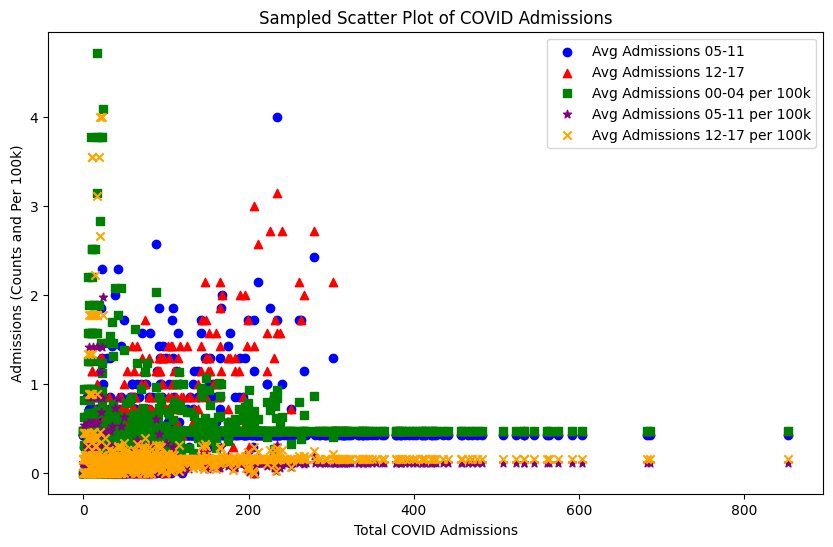

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

sampled_data = df_column_filled.sample(n=1000, random_state=1)  # Randomly sample 5000 rows

plt.figure(figsize=(10, 6))

# Plotting different data series
plt.scatter(sampled_data['admissions_all_covid_confirmed'], sampled_data['average_admissions_05_11_covid_confirmed'],
            color='blue', label='Avg Admissions 05-11', marker='o')
plt.scatter(sampled_data['admissions_all_covid_confirmed'], sampled_data['average_admissions_12_17_covid_confirmed'],
            color='red', label='Avg Admissions 12-17', marker='^')
plt.scatter(sampled_data['admissions_all_covid_confirmed'], sampled_data['average_admissions_00_04_covid_confirmed_per_100k'],
            color='green', label='Avg Admissions 00-04 per 100k', marker='s')
plt.scatter(sampled_data['admissions_all_covid_confirmed'], sampled_data['average_admissions_05_11_covid_confirmed_per_100k'],
            color='purple', label='Avg Admissions 05-11 per 100k', marker='*')
plt.scatter(sampled_data['admissions_all_covid_confirmed'], sampled_data['average_admissions_12_17_covid_confirmed_per_100k'],
            color='orange', label='Avg Admissions 12-17 per 100k', marker='x')

# Setting plot labels and title
plt.xlabel('Total COVID Admissions')
plt.ylabel('Admissions (Counts and Per 100k)')
plt.title('Sampled Scatter Plot of COVID Admissions')
plt.legend()
plt.show()


# Observations

The plot reveals a concentration of data points along the bottom of the Y-axis for all age groups, implying that higher admission counts are less common. There does not appear to be a clear trend or correlation between the total COVID admissions and the average admissions for these pediatric age groups when adjusted per 100k. This could imply that the rates of pediatric admissions do not increase linearly.

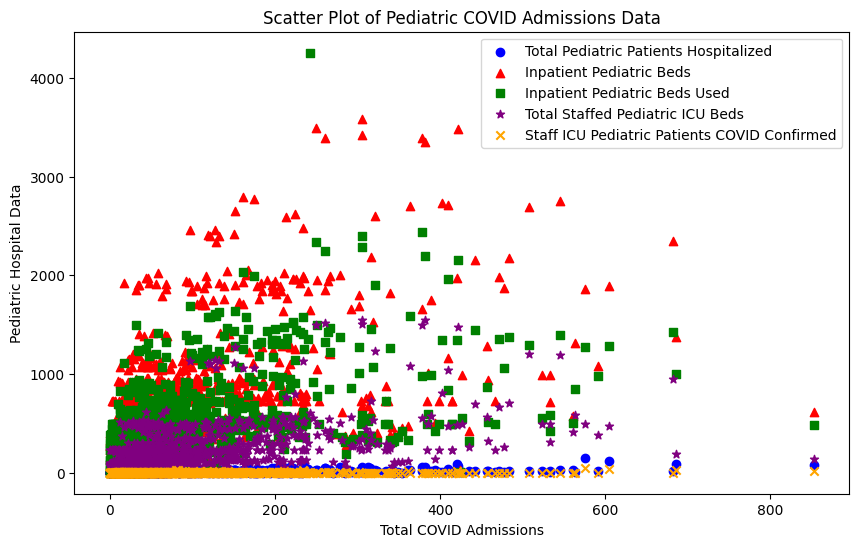

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

sampled_data = df_column_filled.sample(n=1000, random_state=1)  # Randomly sample 5000 rows

plt.figure(figsize=(10, 6))

# Plotting different data series related to pediatric care
plt.scatter(sampled_data['admissions_all_covid_confirmed'], sampled_data['total_pediatric_patients_hospitalized_covid_confirmed'],
            color='blue', label='Total Pediatric Patients Hospitalized', marker='o')
plt.scatter(sampled_data['admissions_all_covid_confirmed'], sampled_data['inpatient_pediatric_beds'],
            color='red', label='Inpatient Pediatric Beds', marker='^')
plt.scatter(sampled_data['admissions_all_covid_confirmed'], sampled_data['inpatient_pediatric_beds_used'],
            color='green', label='Inpatient Pediatric Beds Used', marker='s')
plt.scatter(sampled_data['admissions_all_covid_confirmed'], sampled_data['total_staffed_pediatric_icu_beds'],
            color='purple', label='Total Staffed Pediatric ICU Beds', marker='*')
plt.scatter(sampled_data['admissions_all_covid_confirmed'], sampled_data['staff_icu_pediatric_patients_covid_confirmed'],
            color='orange', label='Staff ICU Pediatric Patients COVID Confirmed', marker='x')

# Setting plot labels and title
plt.xlabel('Total COVID Admissions')
plt.ylabel('Pediatric Hospital Data')
plt.title('Scatter Plot of Pediatric COVID Admissions Data')
plt.legend()
plt.show()


# Observations

There does not seem to be a clear linear correlation between total COVID admissions and the number of pediatric resources available or used, which could imply that pediatric healthcare needs do not directly parallel overall COVID admission rates. The presence of many data points for certain metrics near the origin could indicate regions with lower overall COVID admissions or could be a result of the data collection or reporting methodology. Although, the red triangles (Inpatient Pediatric Beds) could point to a limit in hospital capacity for pediatric patients, regardless of the increase in total COVID admissions.

# Part 2

The available dataset showed no clear-cut picture of the pandemic's impact on the pediatric healthcare system. Thusm we recognize the need to extend our exploration and delve deeper into the dataset for further evaluation. We will now shift our focus to the newly assembled dataframe dfr, seeking to unearth more pronounced insights.

<ipython-input-23-2722900e59bb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dfr, x='Admissions Category', order=['Low', 'Medium', 'High', 'Very High'], palette="Set2")


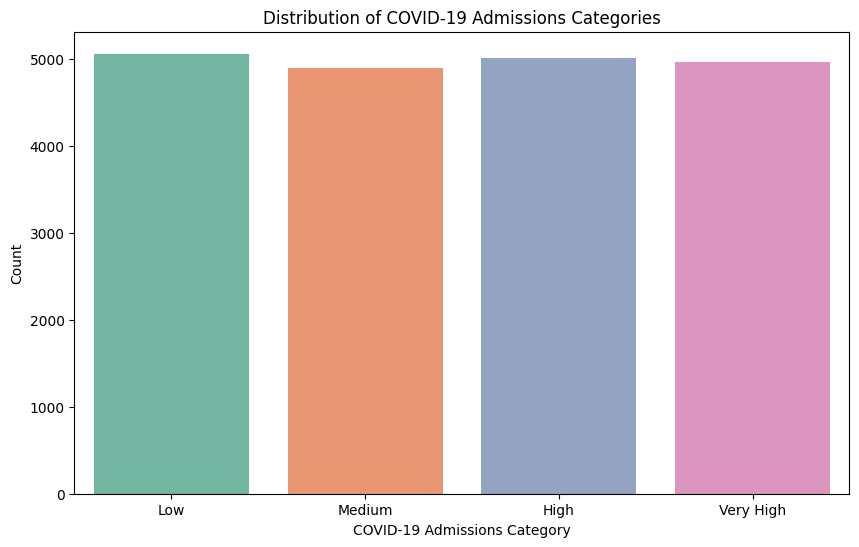

In [23]:
# Define the bins and labels for categorizing daily admissions
bins = [0, 20, 52, 121, np.inf]
labels = ['Low', 'Medium', 'High', 'Very High']
# Categorize the 'admissions_all_covid_confirmed' column based on the defined bins and labels
dfr['Admissions Category'] = pd.cut(dfr['admissions_all_covid_confirmed'], bins=bins, labels=labels)
# Create a figure for the count plot
plt.figure(figsize=(10, 6))
# Plot the count of each admissions category using a bar plot
sns.countplot(data=dfr, x='Admissions Category', order=['Low', 'Medium', 'High', 'Very High'], palette="Set2")
# Set the title, x-label, and y-label of the plot
plt.title('Distribution of COVID-19 Admissions Categories')
plt.xlabel('COVID-19 Admissions Category')
plt.ylabel('Count')
# Display the plot
plt.show()

It represents the count of COVID-19 cases across four categories: Low, Medium, High, and Very High. This graph could be useful for understanding the distribution of case severities in a certain population or during a specific time period.

Key points:

1. Categories: The categories likely represent the severity of the COVID-19 cases upon admission.

2. Equal Distribution: Each category has an equal count of 5000 cases, suggesting a balanced distribution across different severity levels.

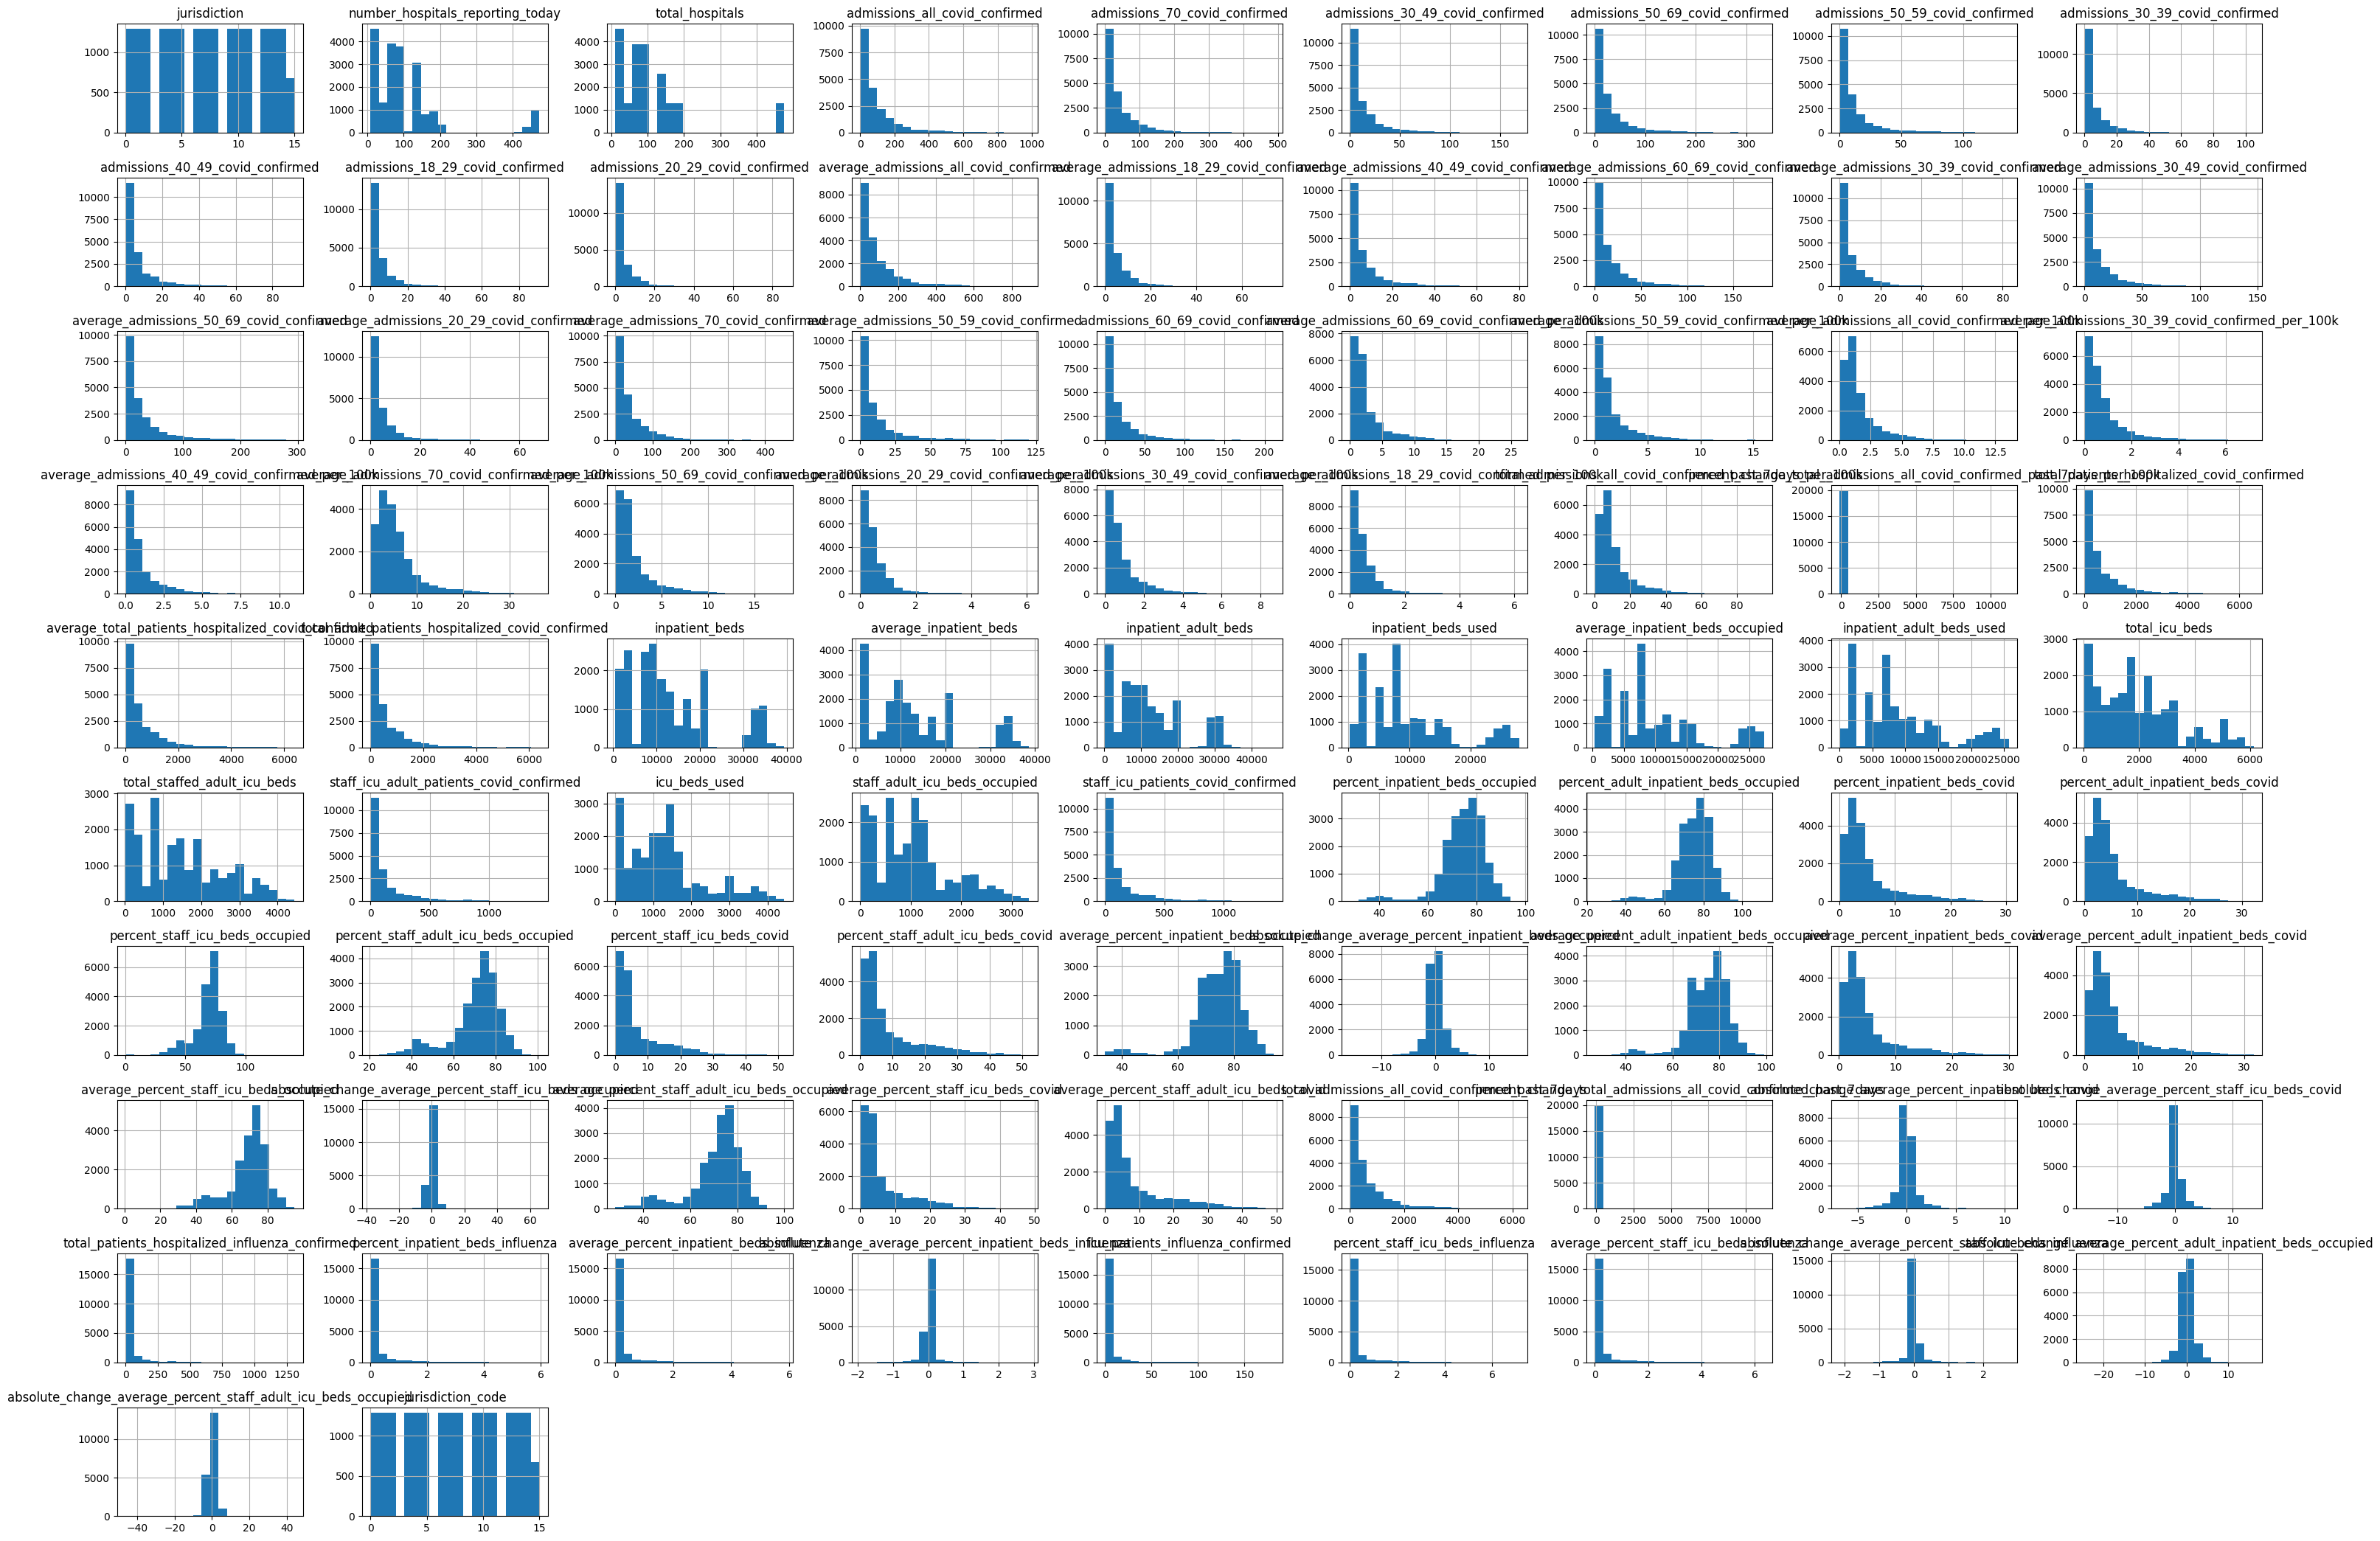

In [24]:
numerical_columns_reduced = dfr.select_dtypes(include=['int64', 'float64']).columns
# Plot histograms for all numerical columns in the reduced dataset
dfr[numerical_columns_reduced].hist(figsize=(30, 21), bins=20)
plt.tight_layout() # Adjust the layout to make sure there's no overlap of histograms
plt.show() #

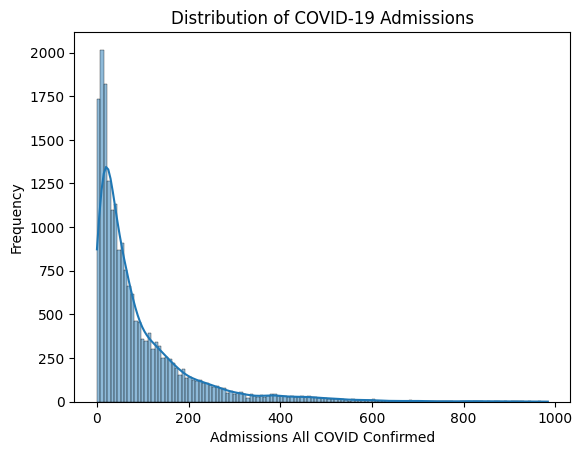

In [25]:
sns.histplot(df_reduced['admissions_all_covid_confirmed'], kde=True)
plt.title('Distribution of COVID-19 Admissions')
plt.xlabel('Admissions All COVID Confirmed')
plt.ylabel('Frequency')
plt.show()

It represents the frequency of COVID-19 cases across a range of confirmed cases.

Key points:

X-Axis (Admissions All COVID Confirmed): This represents the total number of confirmed COVID-19 cases. It ranges from 0 to 1000.

Y-Axis (Frequency): This represents the frequency of admissions for each level of confirmed cases. It ranges from 0 to 2000.

Distribution: The graph shows a sharp peak in admissions around 0-200 confirmed cases, followed by a rapid decline as the number of confirmed cases increases.

This graph could be useful for understanding the distribution of case severities in a certain population or during a specific time period.

The heat map appears as a Correlation Matrix. Here’s a summary of its key elements:

Purpose: It visualizes the correlation between different variables.

Color Coding: Darker red indicates a strong positive correlation, darker blue indicates a strong negative correlation, and lighter colors represent weaker correlations.

Values: Correlation coefficients range from -1 to 1, with some cells displaying numerical values to represent specific correlations.

This type of visualization is useful for quickly identifying relationships between variables, which can be crucial for data analysis in various fields.

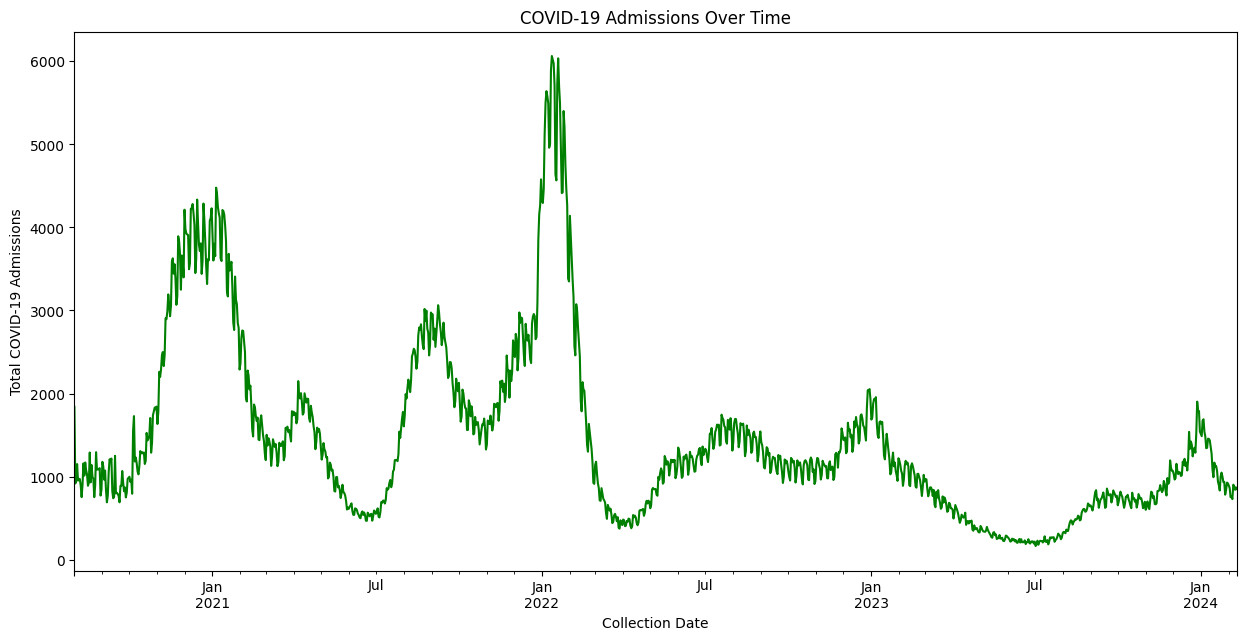

In [26]:
#converting 'collection_date' to datetime
dfr['collection_date'] = pd.to_datetime(dfr['collection_date'])
#COVID-19 admissions over time
plt.figure(figsize=(15, 7))
dfr.groupby('collection_date')['admissions_all_covid_confirmed'].sum().plot(kind='line', color='green')
plt.title('COVID-19 Admissions Over Time')
plt.xlabel('Collection Date')
plt.ylabel('Total COVID-19 Admissions')
plt.show()

The image is a line graph titled “COVID-19 Admissions Over Time”. Here’s what it represents:

1. X-Axis (Collection Date): This represents the time period from January 2021 to January 2024.
2. Y-Axis (Total COVID-19 Admissions): This represents the total number of COVID-19 admissions, ranging from 0 to 6000.

Trend: The graph shows fluctuations in the number of admissions over time, with a noticeable spike around January 2022, indicating a significant increase in COVID-19 admissions during that period.

This graph could be useful for understanding the trend of COVID-19 admissions over the specified time period.

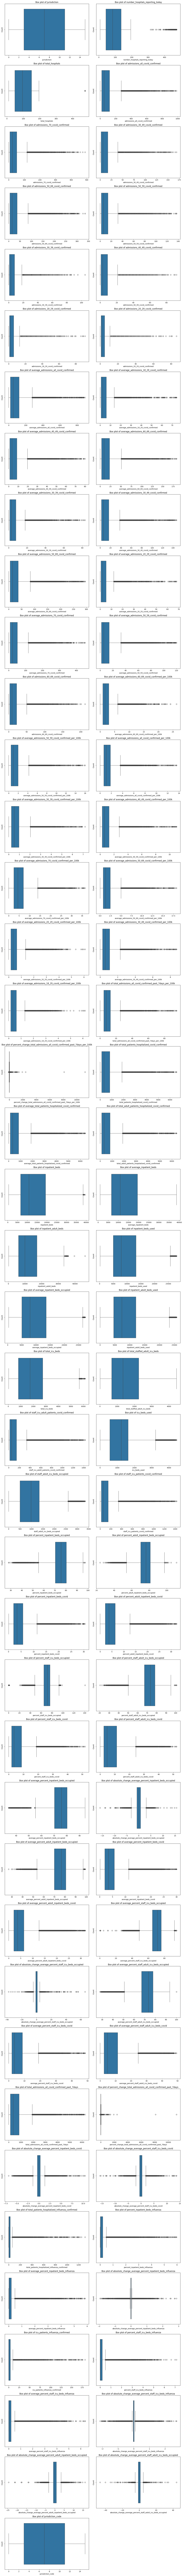

In [27]:
#excluding 'collection_date' from the list of numerical columns for plotting
numerical_columns_to_plot = [col for col in numerical_columns_reduced if col != 'collection_date']
num_rows = len(numerical_columns_to_plot) // 2 + len(numerical_columns_to_plot) % 2
#plotting box plots for all numerical columns excluding 'collection_date'
fig, axs = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, num_rows * 5))
axs = axs.flatten()

for i, col in enumerate(numerical_columns_to_plot):
    sns.boxplot(x=dfr[col], ax=axs[i])
    axs[i].set_title(f'Box plot of {col}')
    axs[i].set_ylabel('Count')

#hide any unused axes if the number of plots is odd
if len(numerical_columns_to_plot) % 2 != 0:
    axs[-1].set_visible(False)

plt.tight_layout()
plt.show()

# Interpreting Box Plots

Box plots are a great way of visualizing data dispersion and central tendency such as outliers.

Jurisdiction: From the results, most of the data points are tightly grouped near one point with few exceptions (indicating that most jurisdictions have similar counts with some considerably different values).

Number of Hospitals Reporting Today: There is a broad range in reporting hospitals that display several outliers on the top end; this could mean that majority of jurisdictions have moderate number of hospitals reporting while a few have substantially more.

Admissions All Covid Confirmed: While median value is low but there are many outliers so spike in COVID admissions consistently occur. The graph shows a right skewness implying fewer cases on most days but occasionally, very high admissions per day.

Average Admissions 60-69 Covid Confirmed per 100K: The distribution is also “skewed to the right” with many extreme observations suggesting infrequent peaks in admission rates for 60-69 years old people per 100k population.

Percent Change Total Admissions All Covid Confirmed Past 7days per 100k: This box plot is skewed, with a big variance and an almost symmetrical distribution of percentage changes implying week-to-week fluctuations in admissions.

Percent Inpatient Beds Occupied: It shows a near median of 50% consistently, but occasional outliers indicate a few days with significantly higher or lower occupancy rates.

Percent Staff ICU Beds Occupied: This distribution looks quite narrow with some outliers indicating several days where the percentage of staff ICU beds occupied was much higher or lower than usual.

Absolute Change Average Percent Inpatient Beds Occupied: There are substantial positive or negative changes in the percentage of occupied inpatient beds seen on some days as shown by this graph but not on most days.

Absolute Change Average Percent Staff ICU Beds Occupied: Like the inpatient beds, there are differences shown here that have minimal change for most days but remarkable variations for others happening.

Absolute Change Average Percent Inpatient Beds Covid: This indicates that the day-to-day change in percentage of Covid-19 patients in bed is usually very little with a median nearly zero but there are some days that it increases or decreases noticeably.

Absolute Change Average Percent Staff ICU Beds Covid: The number states that the variation in the percent of staff ICU beds occupied by COVID-19 patients is minimal and persistent across days with most having a median around zero although some have extreme changes.

Total Patients Hospitalized Influenza Confirmed: Many outliers represent high influenza hospitalizations counts occasionally during the other days.

Percent Inpatient Beds Influenza: It’s highly possible to observe low average values and some extreme values at the same time, suggesting that bed occupancy due to influenza has a small mean and a high standard deviation.

Absolute Change Average Percent Inpatient Beds Influenza: Most of the changes are clustered around zero on this graph, but there are some noticeable increases and decreases.

Absolute Change Average Percent Staff Adult ICU Beds Occupied: Similar pattern as previously, where most changes are small but with outliers on both sides which imply days of great fluctuations.

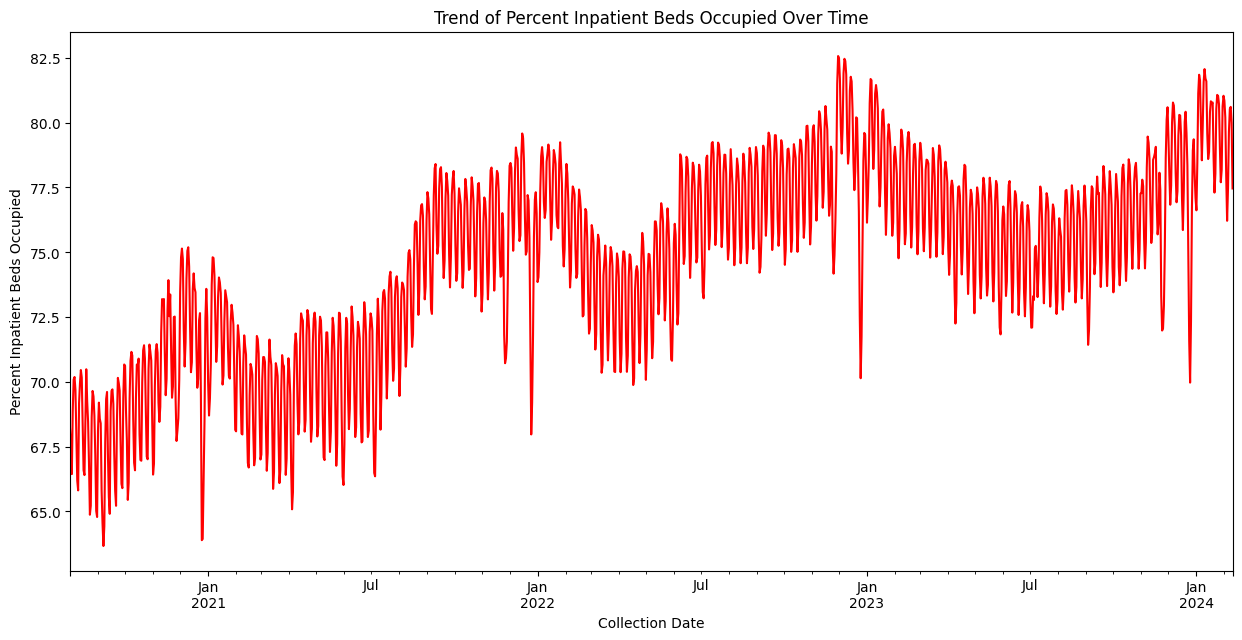

In [28]:
#plotting trends for key metrics like percent of inpatient beds occupied
plt.figure(figsize=(15, 7))
dfr.groupby('collection_date')['percent_inpatient_beds_occupied'].mean().plot(kind='line', color='red')
plt.title('Trend of Percent Inpatient Beds Occupied Over Time')
plt.xlabel('Collection Date')
plt.ylabel('Percent Inpatient Beds Occupied')
plt.show()

This image represents:

1. X-Axis (Collection Date): This represents the time period from January 2021 to January 2024.
2. Y-Axis (Percent Inpatient Beds Occupied): This represents the percentage of inpatient beds occupied, ranging from 65.0 to 82.5.

Trend: The graph shows fluctuations in the percentage of occupied inpatient beds over time. There doesn’t seem to be a clear pattern of increase or decrease over the three years.

This graph could be useful for understanding the occupancy rate of inpatient beds over the specified time period.

#### Let's analyze the aspects that directly relate to the healthcare system's response to COVID-19.

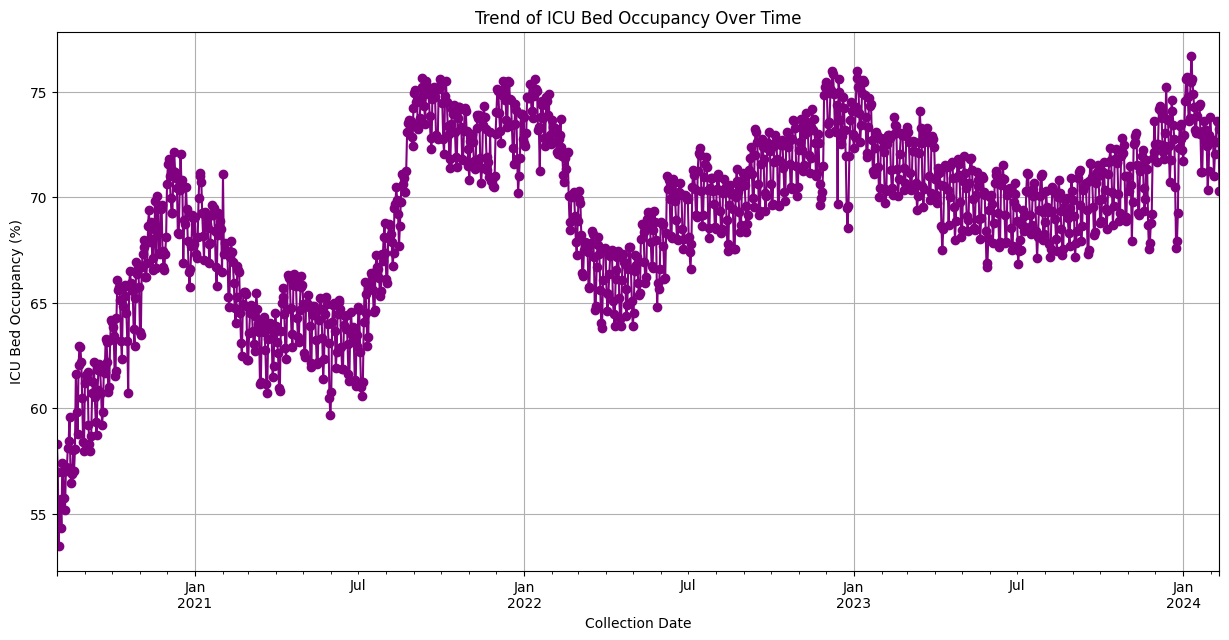

In [29]:
#analyzing the trend for ICU Bed Occupancy
dfr['collection_date'] = pd.to_datetime(dfr['collection_date'])  # Ensuring 'collection_date' is datetime type
plt.figure(figsize=(15, 7))
dfr.groupby('collection_date')['percent_staff_icu_beds_occupied'].mean().plot(marker='o', linestyle='-', color='purple')
plt.title('Trend of ICU Bed Occupancy Over Time')
plt.xlabel('Collection Date')
plt.ylabel('ICU Bed Occupancy (%)')
plt.grid(True)
plt.show()

The image represents :-

1. X-Axis (Collection Date): This represents the time period from January 2021 to January 2024.
2. Y-Axis (ICU Bed Occupancy in %): This represents the percentage of ICU beds occupied, ranging from approximately 55% to 75%.

Trend: The graph shows fluctuations in the percentage of occupied ICU beds over time. There doesn’t seem to be a clear pattern of increase or decrease over the three years.

This graph could be useful for understanding the occupancy rate of ICU beds over the specified time period.

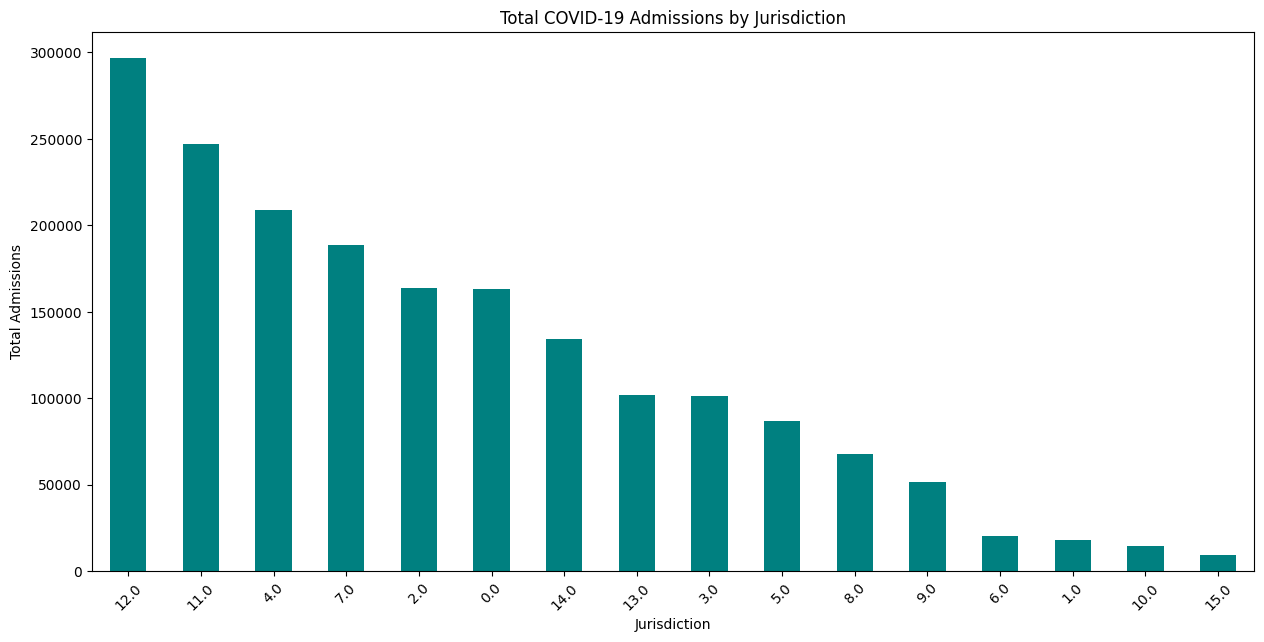

In [30]:
#summarizing COVID-19 Admissions by Jurisdiction
admissions_by_jurisdiction = dfr.groupby('jurisdiction')['admissions_all_covid_confirmed'].sum().sort_values(ascending=False)
admissions_by_jurisdiction.plot(kind='bar', figsize=(15, 7), color='teal')
plt.title('Total COVID-19 Admissions by Jurisdiction')
plt.xlabel('Jurisdiction')
plt.ylabel('Total Admissions')
plt.xticks(rotation=45)
plt.show()

The image represents :-

1. X-Axis (Jurisdictions): This represents different jurisdictions, including regions and states.
2. Y-Axis (Total COVID-19 Admissions): This represents the total number of COVID-19 admissions, ranging from 0 to 300,000.

Bar Heights: The height of each bar represents the total number of COVID-19 admissions for that jurisdiction.
For example, “Region 7” has the highest number of admissions, reaching close to 300,000.

This graph could be useful for understanding the distribution of COVID-19 admissions across different jurisdictions.

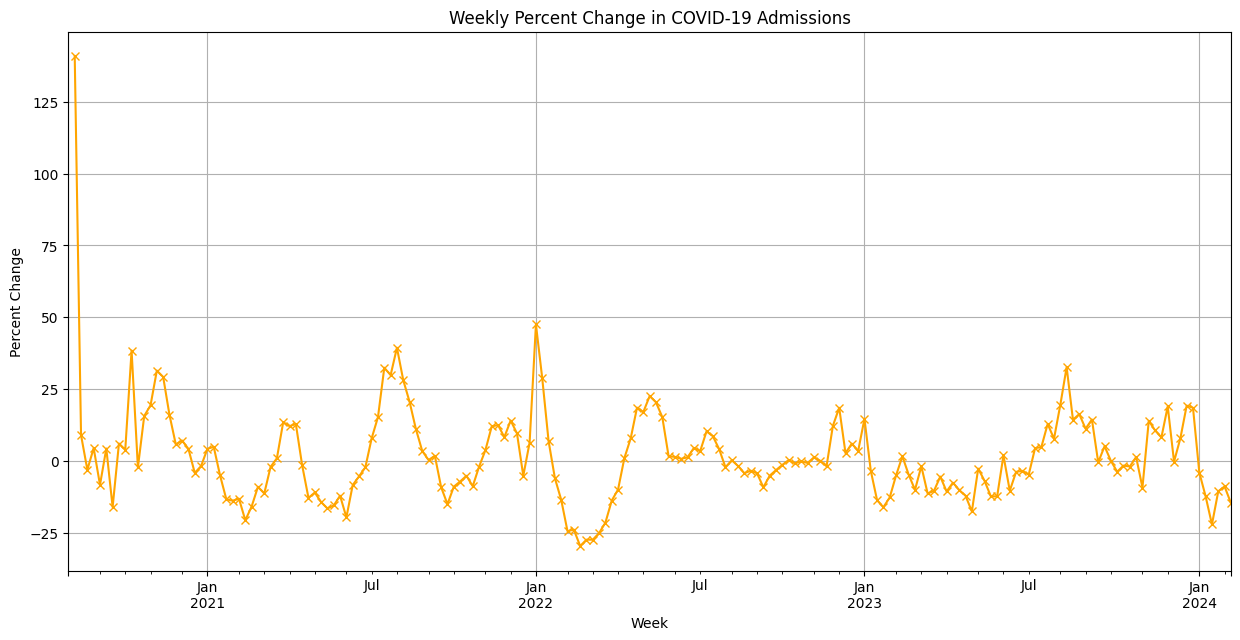

In [31]:
#calculating Weekly Percent Change in COVID-19 Admissions
weekly_admissions = dfr.set_index('collection_date').resample('W')['admissions_all_covid_confirmed'].sum()
weekly_percent_change = weekly_admissions.pct_change().mul(100)
weekly_percent_change.plot(figsize=(15, 7), marker='x', linestyle='-', color='orange')
plt.title('Weekly Percent Change in COVID-19 Admissions')
plt.xlabel('Week')
plt.ylabel('Percent Change')
plt.grid(True)
plt.show()

The image is a line graph titled “Weekly Percent Change in COVID-19 Admissions” which represents:-

1. X-Axis (Collection Date): This represents the time period from January 2021 to January 2024.
2. Y-Axis (Percent Change in COVID-19 Admissions): This represents the weekly percent change in COVID-19 admissions, ranging from -25% to 125%.

Trend: The graph shows fluctuations in the weekly percent change in COVID-19 admissions over time. There are significant spikes and drops visible at various points on the graph, indicating variability in COVID-19 admissions.

number_hospitals_reporting_today, average_admissions_60_69_covid_confirmed_per_100k, and total_patients_hospitalized_influenza_confirmed may be useful for further analysis and modeling as they exhibit stronger associations with the target variable admissions_all_covid_confirmed. We will also consider 'percent_inpatient_beds_influenza' as it showed some positive relation.

# Features Selection

# (i) Correlation Analysis

In [32]:
from scipy.stats import spearmanr

# List of feature columns
feature_columns = ['percent_inpatient_beds_occupied',
    'percent_staff_icu_beds_occupied',
    'total_patients_hospitalized_influenza_confirmed',
    'percent_inpatient_beds_influenza', 'jurisdiction',
    'number_hospitals_reporting_today',
    'average_admissions_60_69_covid_confirmed_per_100k',
    'percent_change_total_admissions_all_covid_confirmed_past_7days_per_100k',
    'percent_inpatient_beds_occupied',
    'percent_staff_icu_beds_occupied',
    'absolute_change_average_percent_inpatient_beds_occupied',
    'absolute_change_average_percent_staff_icu_beds_occupied',
    'absolute_change_average_percent_inpatient_beds_covid',
    'absolute_change_average_percent_staff_icu_beds_covid',
    'total_patients_hospitalized_influenza_confirmed',
    'percent_inpatient_beds_influenza',
    'absolute_change_average_percent_inpatient_beds_influenza',
    'absolute_change_average_percent_staff_adult_icu_beds_occupied']

# Calculate Spearman correlation coefficient between 'AverageGateArrivalDelay' and each feature
for col in feature_columns:
    if col in dfr.columns:
        rho, p = spearmanr(dfr[col].values, dfr['admissions_all_covid_confirmed'].values)
        print('Spearman correlation between admissions_all_covid_confirmed and %s is %s' %(col, round(rho, 4)))
    else:
        print("Column '%s' not found in DataFrame." % col)


Spearman correlation between admissions_all_covid_confirmed and percent_inpatient_beds_occupied is -0.125
Spearman correlation between admissions_all_covid_confirmed and percent_staff_icu_beds_occupied is -0.003
Spearman correlation between admissions_all_covid_confirmed and total_patients_hospitalized_influenza_confirmed is 0.3566
Spearman correlation between admissions_all_covid_confirmed and percent_inpatient_beds_influenza is 0.1196
Spearman correlation between admissions_all_covid_confirmed and jurisdiction is 0.0427
Spearman correlation between admissions_all_covid_confirmed and number_hospitals_reporting_today is 0.6727
Spearman correlation between admissions_all_covid_confirmed and average_admissions_60_69_covid_confirmed_per_100k is 0.6027
Spearman correlation between admissions_all_covid_confirmed and percent_change_total_admissions_all_covid_confirmed_past_7days_per_100k is 0.1087
Spearman correlation between admissions_all_covid_confirmed and percent_inpatient_beds_occupied

Here's a summary:

Strong Positive Correlation (Absolute Value > 0.5):

number_hospitals_reporting_today: The number of hospitals reporting today has a strong positive correlation (0.6727) with admissions_all_covid_confirmed. This indicates that as the number of hospitals reporting increases, the count of confirmed COVID-19 admissions also tends to increase.


Moderate Positive Correlation (0.3 < Absolute Value < 0.5):

average_admissions_60_69_covid_confirmed_per_100k: This feature has a moderate positive correlation (0.6027) with admissions_all_covid_confirmed, suggesting that higher rates of COVID-19 admissions in the age group 60-69 per 100k population are associated with higher overall admissions.

total_patients_hospitalized_influenza_confirmed: There is a moderate positive correlation (0.3566) between this feature and admissions_all_covid_confirmed, indicating that higher counts of confirmed influenza hospitalizations are associated with higher counts of COVID-19 admissions.


Weak Correlation (Absolute Value < 0.3): We can eliminate these columns.

# (ii)  Features Selection through Random Forest Regressor

In [33]:
dfr.head(5)

jurisdiction collection_date  number_hospitals_reporting_today  \
0           0.0      2020-08-01                                55   
1           0.0      2020-08-02                                76   
2           0.0      2020-08-03                                82   
3           0.0      2020-08-04                                81   
4           0.0      2020-08-05                                84   

   total_hospitals  admissions_all_covid_confirmed  \
0               95                              95   
1               95                             124   
2               95                             100   
3               95                             121   
4               95                             120   

   admissions_70_covid_confirmed  admissions_30_49_covid_confirmed  \
0                             26                                16   
1                             29                                24   
2                             26                                21   
3                             32                                23   
4                             27                                28   

   admissions_50_69_covid_confirmed  admissions_50_59_covid_confirmed  \
0                                35                              16.0   
1                                34                              12.0   
2                                28                              14.0   
3                                32                              12.0   
4                                35                              14.0   

   admissions_30_39_covid_confirmed  ...  \
0                                 6  ...   
1                                 8  ...   
2                                13  ...   
3                                12  ...   
4                                14  ...   

   average_percent_inpatient_beds_influenza  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   absolute_change_average_percent_inpatient_beds_influenza  \
0                                                0.0          
1                                                0.0          
2                                                0.0          
3                                                0.0          
4                                                0.0          

   icu_patients_influenza_confirmed  percent_staff_icu_beds_influenza  \
0                                 0                               0.0   
1                                 0                               0.0   
2                                 0                               0.0   
3                                 0                               0.0   
4                                 0                               0.0   

   average_percent_staff_icu_beds_influenza  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   absolute_change_average_percent_staff_icu_beds_influenza  \
0                                                0.0          
1                                                0.0          
2                                                0.0          
3                                                0.0          
4                                                0.0          

   absolute_change_average_percent_adult_inpatient_beds_occupied  \
0                                          -4.736754               
1                                          -3.808385               
2                                          -2.949899               
3                                          -2.521649               
4                                  

In [34]:
# Defining the features and the target of the model

# Define the features and the target of the model
features = [
    'number_hospitals_reporting_today',
    'average_admissions_60_69_covid_confirmed_per_100k',
    'percent_change_total_admissions_all_covid_confirmed_past_7days_per_100k',
    'percent_inpatient_beds_occupied',
    'percent_staff_icu_beds_occupied',
    'absolute_change_average_percent_inpatient_beds_occupied',
    'absolute_change_average_percent_staff_icu_beds_occupied',
    'absolute_change_average_percent_inpatient_beds_covid',
    'absolute_change_average_percent_staff_icu_beds_covid',
    'total_patients_hospitalized_influenza_confirmed',
    'percent_inpatient_beds_influenza',
    'absolute_change_average_percent_inpatient_beds_influenza',
    'absolute_change_average_percent_staff_adult_icu_beds_occupied',

]

target = 'admissions_all_covid_confirmed'

X = dfr[features].values         # Features
y = dfr[target].values           # Target

In [35]:
# Breaking the data into train and test subsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [36]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=300, random_state=3) # Instantiating 'RandomForestRegressor'
rf_reg.fit(X_train, y_train)   # Fitting the data

RandomForestRegressor(n_estimators=300, random_state=3)

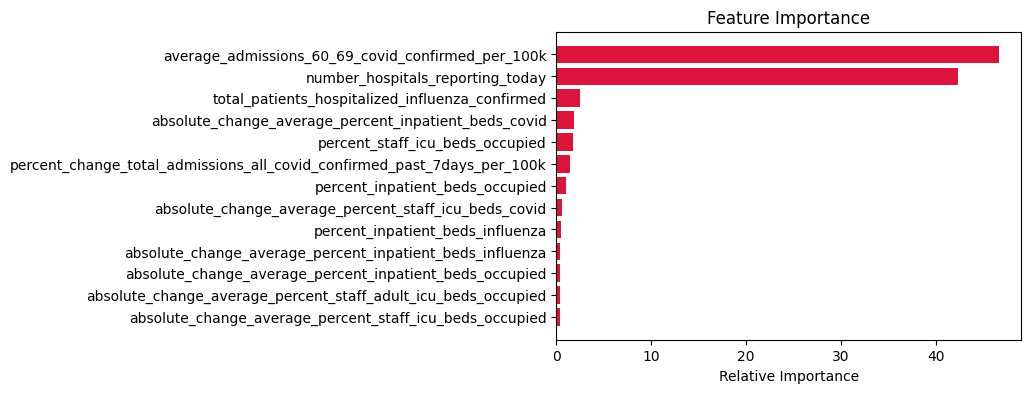

In [37]:
# Calculating the feature importance
feature_importance = rf_reg.feature_importances_
feature_importance = 100.0 * (feature_importance / np.sum(feature_importance))

# Displaying the relative feature importance by a horizontal bar chart
sorted_idx = np.argsort(feature_importance)
pos = np.arange(len(features)) + 0.5  # pos is created using the length of features
plt.figure(figsize=(6, 4))

plt.title("Feature Importance")
plt.xlabel('Relative Importance')
plt.barh(pos, feature_importance[sorted_idx], color='crimson', align="center")
plt.yticks(pos, [features[i] for i in sorted_idx])  # Using list comprehension to get feature names
plt.show()


We can select First 6 features for further evalaution.

# (iii) Heatmap

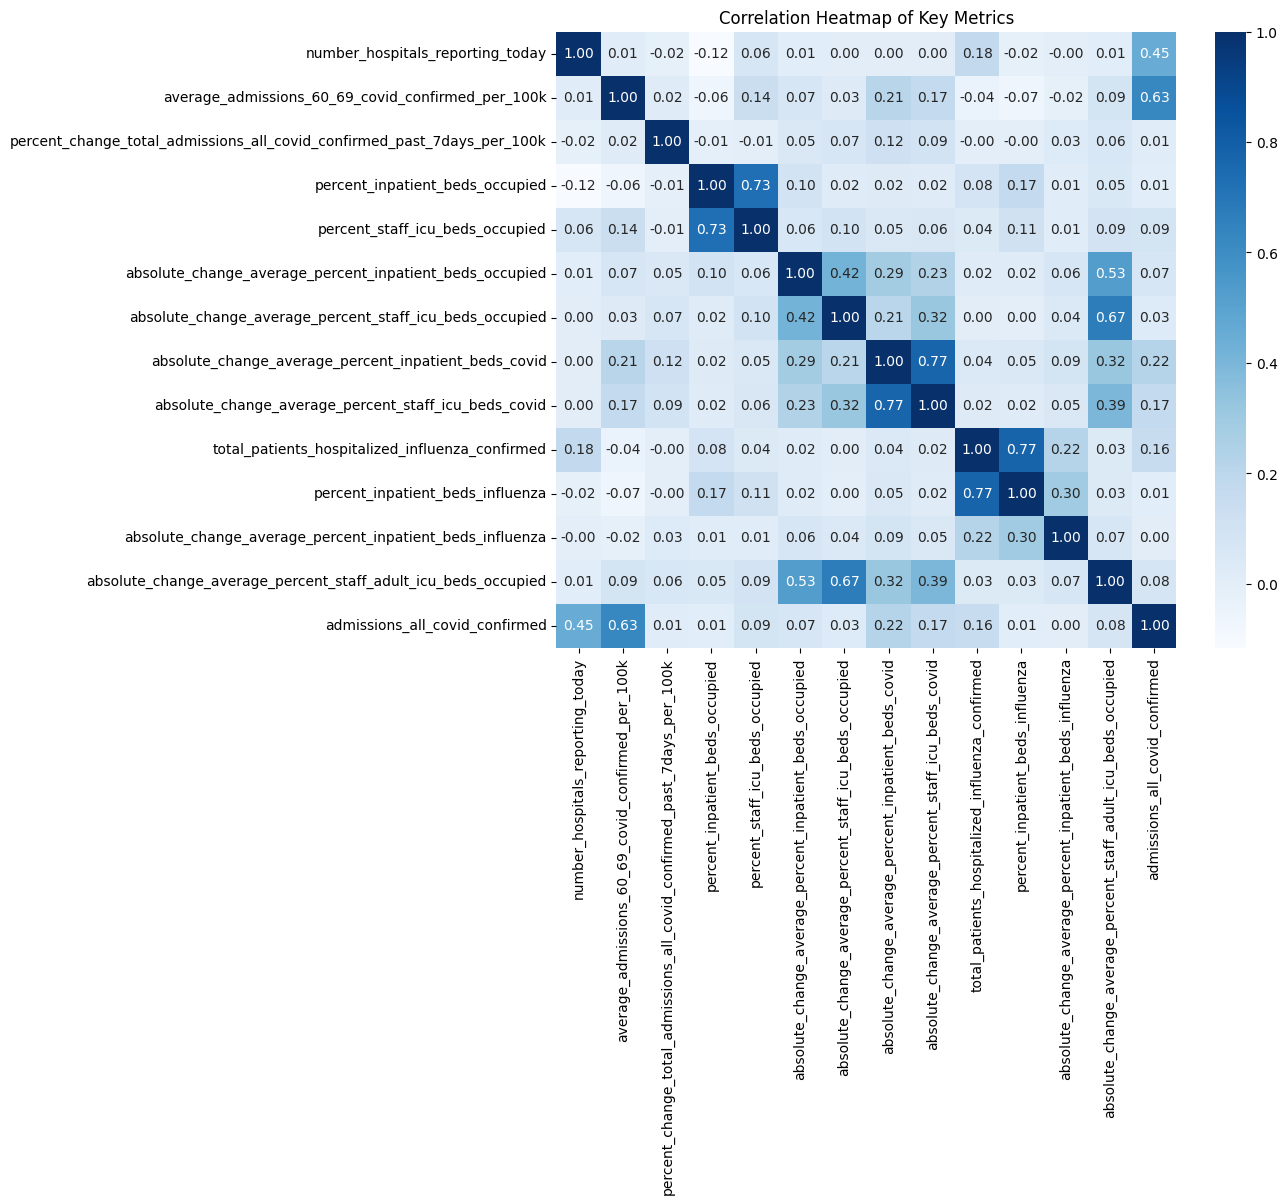

In [38]:
#selecting key metrics for correlation analysis
key_metrics = [
    'number_hospitals_reporting_today',
    'average_admissions_60_69_covid_confirmed_per_100k',
    'percent_change_total_admissions_all_covid_confirmed_past_7days_per_100k',
    'percent_inpatient_beds_occupied',
    'percent_staff_icu_beds_occupied',
    'absolute_change_average_percent_inpatient_beds_occupied',
    'absolute_change_average_percent_staff_icu_beds_occupied',
    'absolute_change_average_percent_inpatient_beds_covid',
    'absolute_change_average_percent_staff_icu_beds_covid',
    'total_patients_hospitalized_influenza_confirmed',
    'percent_inpatient_beds_influenza',
    'absolute_change_average_percent_inpatient_beds_influenza',
    'absolute_change_average_percent_staff_adult_icu_beds_occupied',
    'admissions_all_covid_confirmed']

#calculating correlation matrix for key metrics
key_metrics_corr = dfr[key_metrics].corr()

#heatmap plotting
plt.figure(figsize=(10, 8))
sns.heatmap(key_metrics_corr, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap of Key Metrics')
plt.show()

Key elements of Heatmap --------------->>>

Correlation: The heatmap uses shades of blue to indicate the strength of correlation between different metrics, with darker shades representing stronger positive correlations.

Interpretation: The off-diagonal blue squares indicate positive correlations between different variables. For instance, 'admissions_all_covid_confirmed' shows some degree of positive correlation with various changes in percentages, suggesting some relationship between overall COVID admissions and changes in hospital metrics. It’s worth noting that there are varying shades of blue, indicating that some correlations are stronger than others. For instance, 'total_patients_hospitalized_influenza_confirmed' has a moderate correlation with 'percent_inpatient_beds_occupied', hinting that influenza.

### Note : From the above 3 analysis we have selected specific features to carry out rest of our work

# Creating a New Dataframe from selected features

In [39]:
import pandas as pd

# Define the columns selected from Random Forest Feature selection graph
selected_columns = [
    'average_admissions_60_69_covid_confirmed_per_100k',
    'number_hospitals_reporting_today',
    'total_patients_hospitalized_influenza_confirmed',
    'absolute_change_average_percent_inpatient_beds_covid',
    'percent_change_total_admissions_all_covid_confirmed_past_7days_per_100k',
    'percent_staff_icu_beds_occupied',
    'admissions_all_covid_confirmed'
]

# Create a new DataFrame with only the selected columns
new_dfr = dfr[selected_columns].copy()

# Display the new DataFrame
new_dfr

average_admissions_60_69_covid_confirmed_per_100k  \
0                                               2.470858   
1                                               2.436541   
2                                               2.282112   
3                                               2.316430   
4                                               2.299271   
...                                                  ...   
20006                                           1.328233   
20007                                           1.328233   
20008                                           1.517980   
20009                                           1.138485   
20010                                           0.569243   

       number_hospitals_reporting_today  \
0                                    55   
1                                    76   
2                                    82   
3                                    81   
4                                    84   
...                                 ...   
20006                                28   
20007                                28   
20008                                28   
20009                                27   
20010                                28   

       total_patients_hospitalized_influenza_confirmed  \
0                                                    0   
1                                                    0   
2                                                    0   
3                                                    0   
4                                                    0   
...                                                ...   
20006                                                3   
20007                                                5   
20008                                                6   
20009                                                5   
20010                                                5   

       absolute_change_average_percent_inpatient_beds_covid  \
0                                              -4.720223      
1                                              -4.596629      
2                                              -4.542419      
3                                              -4.424980      
4                                              -4.007678      
...                                                  ...      
20006                                           0.264030      
20007                                           0.306059      
20008                                           0.328410      
20009                                           0.289101      
20010                                           0.200577      

       percent_change_total_admissions_all_covid_confirmed_past_7days_per_100k  \
0                                             -10.204082                         
1                                             -11.293634                         
2                                              -7.692308                         
3                                              -9.247312                         
4                                             -11.158798                         
...                                                  ...                         
20006                                          60.869565                         
20007                                          48.000000                         
20008                                          33.333333                         
20009                                          50.000000                         
20010                                           9.677419                         

       percent_staff_icu_beds_occupied  admissions_all_covid_confirmed  
0                            60.619150                              95  
1                            56.467316                             124  
2                            52.963918                             100  
3                            57.719411

# Performing Linear Regression through scikit-learn

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assigning 'admissions_all_covid_confirmed' as the target variable
target_variable = 'admissions_all_covid_confirmed'

# Listing of feature columns
feature_columns = [
     'number_hospitals_reporting_today',
    'average_admissions_60_69_covid_confirmed_per_100k',
    'total_patients_hospitalized_influenza_confirmed',
    'absolute_change_average_percent_inpatient_beds_covid',
    'percent_staff_icu_beds_occupied',
    'percent_change_total_admissions_all_covid_confirmed_past_7days_per_100k']

# Extracting features and target variable
X = new_dfr[feature_columns]
y = new_dfr[target_variable]

# Splitting the dataset into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Initiating linear regression model
reg = LinearRegression()

# Fitting the model on the training data
reg.fit(X_train, y_train)

# Predicting on the training and test data
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Calculating R2 score for train and test subsets
r2_train_score = r2_score(y_train, y_train_pred)
r2_test_score = r2_score(y_test, y_test_pred)

# Printing coefficients of the linear model
print('Coefficients of Linear Model by scikit learn:', reg.coef_)
print('Intercept by scikit learn:', reg.intercept_,'\n')

# Printing the R2 scores
print('R^2 score for train dataset by scikit learn:', round(r2_train_score, 4))
print('R^2 score for test dataset by scikit learn:', round(r2_test_score, 4),)

Coefficients of Linear Model by scikit learn: [ 4.78405327e-01  2.69585707e+01  1.25530845e-01  9.13001134e+00
 -3.46315977e-01 -3.61134602e-03]
Intercept by scikit learn: -6.026951970349785 

R^2 score for train dataset by scikit learn: 0.6098
R^2 score for test dataset by scikit learn: 0.6133


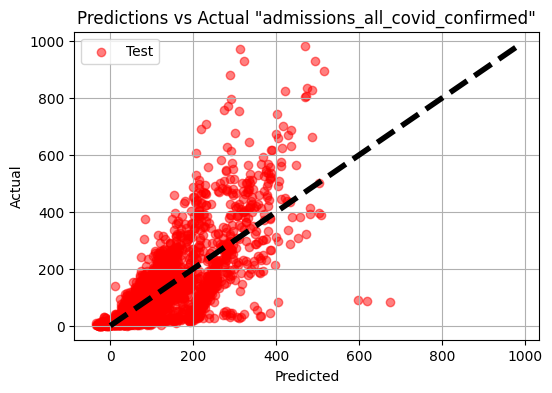

In [41]:
import matplotlib.pyplot as plt

# Plotting the scatter plot to observe how predicted and actual values behaving.
plt.figure(figsize=(6, 4))
plt.scatter(y_test_pred, y_test, color='red', alpha=0.5, label='Test')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4) # Draw line y=x
plt.title('Predictions vs Actual "admissions_all_covid_confirmed"')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.legend()
plt.grid(True)
plt.show()

# Interpretation

The closer a point in above plot is to the  𝑦=𝑥 line, the more realistic the prediction for the "admissions_all_covid_confirmed". Most test data points are clustered around the diagonal line, suggesting that the predictions are generally accurate. However, there is a noticeable deviation, especially at lower values, indicating areas where the model’s predictions are less accurate.

# Ridge Regression (Regularization)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Fitting the Ridge regression model on the train set
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

# Calculating R^2 score for train and test datasets
r2_train = ridge_reg.score(X_train, y_train)
r2_test = ridge_reg.score(X_test, y_test)

# Calculating the coefficients and intercept
coefs = ridge_reg.coef_
intercept = ridge_reg.intercept_

print("Coefficients:", coefs)
print("Intercept:", intercept, '\n')

# Printing R^2 scores for train and test datasets
print("R^2 Score for Train Data:", r2_train)
print("R^2 Score for Test Data:", r2_test)


Coefficients: [ 4.78405330e-01  2.69583568e+01  1.25530742e-01  9.12966794e+00
 -3.46307138e-01 -3.61086911e-03]
Intercept: -6.0270240780068605 

R^2 Score for Train Data: 0.6097851973084683
R^2 Score for Test Data: 0.6133434452184732


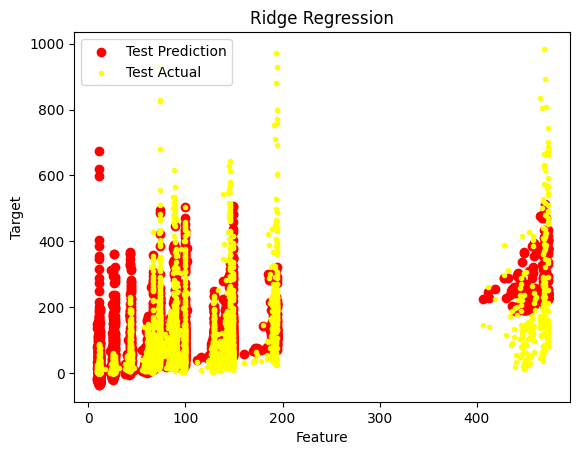

In [43]:
import matplotlib.pyplot as plt

# Visualizing the data
y_pred_train = ridge_reg.predict(X_train)
y_pred_test = ridge_reg.predict(X_test)

# Plotting test predictions and actual values for Ridge Regression
plt.scatter(X_test.iloc[:, 0], y_pred_test, label='Test Prediction', color='red')
plt.scatter(X_test.iloc[:, 0], y_test, label='Test Actual', color='yellow', marker='.')

plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Ridge Regression')
plt.legend()
plt.show()


# Observation

The overlap of red and yellow dots indicate where the model's predictions closely match the actual values. The separation of red and yellow dots, particularly in areas where the red dots are far from the yellow ones, suggests discrepancies between the predicted and actual values, indicating potential areas where the model does not perform as well.

# Lasso Regression (Regularization)

In [44]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assigning 'admissions_all_covid_confirmed' as the target variable
target_variable = 'admissions_all_covid_confirmed'

# Listing of feature columns
feature_columns = [
    'number_hospitals_reporting_today',
    'average_admissions_60_69_covid_confirmed_per_100k',
    'total_patients_hospitalized_influenza_confirmed',
    'absolute_change_average_percent_inpatient_beds_covid',
    'percent_staff_icu_beds_occupied',
    'percent_change_total_admissions_all_covid_confirmed_past_7days_per_100k']

# Extracting features and target variable
X = new_dfr[feature_columns]
y = new_dfr[target_variable]

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting Lasso regression with penalty factor alpha=2.0
lasso_reg = Lasso(alpha=2.0)
lasso_reg.fit(X_train, y_train)

# Calculating R^2 score for Lasso regression on both train and test sets
r2_score_train = lasso_reg.score(X_train, y_train)
r2_score_test = lasso_reg.score(X_test, y_test)

# Coefficients of regression for all features (Lasso regression)
coefficients_lasso = lasso_reg.coef_
print("Coefficients of regression for all features (Lasso regression):\n", coefficients_lasso)

# Calculating the intercept/bias term
intercept = lasso_reg.intercept_
print("Intercept:", intercept, '\n')

print("R^2 Score for Lasso Regression (Train):", r2_score_train)
print("R^2 Score for Lasso Regression (Test):", r2_score_test)


Coefficients of regression for all features (Lasso regression):
 [ 4.84300970e-01  2.71476499e+01  1.21253871e-01  7.38060968e+00
 -2.94830787e-01  3.53549088e-03]
Intercept: -9.910985402131317 

R^2 Score for Lasso Regression (Train): 0.6105057944785701
R^2 Score for Lasso Regression (Test): 0.6085412521279656


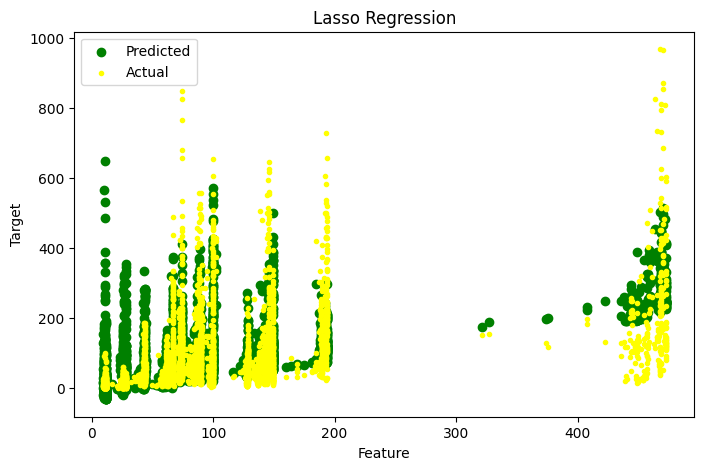

In [45]:
# Visualizing Lasso Regression Results
y_pred_lasso = lasso_reg.predict(X_test)

# Plotting the results for Lasso Regression using a scatter plot
plt.scatter(X_test.iloc[:, 0], y_pred_lasso, color='green', label='Predicted')
plt.scatter(X_test.iloc[:, 0], y_test, color='yellow', label='Actual', marker='.')
plt.title('Lasso Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.gcf().set_size_inches(8, 5)
plt.legend()
plt.show()

# Observation

The model seems to predict quite a few data points near the lower end of the target variable's range, but fewer as the target value increases. There is a significant spread between the predicted and actual values, especially for higher target values, which suggests that the model might be underestimating the target in many cases. The distribution of actual values suggests a possible non-linear relationship or a grouping of the data points.

# Discussion

Although the R-squared (R^2) values may appear similar before and after regularization, the regularization techniques (Ridge and Lasso) still contribute to improving the model's performance in many ways. Like, if the R^2 values may not show a significant improvement after regularization, the regularization techniques still contribute to enhancing the model's performance by reducing overfitting, improving stability, facilitating feature selection, noise cancellation and addressing multicollinearity. These factors collectively lead to a more robust and reliable model, even if the improvement in R^2 score may not be substantial.

Overall, the Linear models appears to perform adequately, as evidenced by the moderate-to-good explanatory power reflected in the R-squared scores. Nonetheless, it's also required to assess other metrics and potentially compare the model against alternative approaches for a comprehensive evaluation.

# Polynomial Regression

In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
# Specify the degree of the polynomial features
poly_degree = 2

# Create polynomial features
poly = PolynomialFeatures(degree=poly_degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [48]:
# Fit the linear regression model on the polynomial features
reg_poly = LinearRegression()
reg_poly.fit(X_train_poly, y_train)

LinearRegression()

In [49]:
poly = PolynomialFeatures(degree=poly_degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
# Fit the linear regression model on the polynomial features
reg_poly = LinearRegression()
reg_poly.fit(X_train_poly, y_train)
# Predicting on the training data
y_train_pred_poly = reg_poly.predict(X_train_poly)

# Predicting on the test data
y_test_pred_poly = reg_poly.predict(X_test_poly)

In [50]:
# Predicting on the training data
y_train_pred_poly = reg_poly.predict(X_train_poly)

# Predicting on the test data
y_test_pred_poly = reg_poly.predict(X_test_poly)

# Calculating R2 scores for the polynomial model
r2_train_poly = r2_score(y_train, y_train_pred_poly)
r2_test_poly = r2_score(y_test, y_test_pred_poly)

print("Polynomial Regression R^2 Score for Training Data:", r2_train_poly)
print("Polynomial Regression R^2 Score for Testing Data:", r2_test_poly)

Polynomial Regression R^2 Score for Training Data: 0.8101597125906765
Polynomial Regression R^2 Score for Testing Data: 0.8080798083257061


In [51]:
# Print coefficients
print("Coefficients of Polynomial Model:", reg_poly.coef_)
print("Intercept of Polynomial Model:", reg_poly.intercept_)

Coefficients of Polynomial Model: [ 8.87015222e-01  1.18488534e+01 -2.44980850e-01 -2.52753358e-01
 -1.41675237e+00 -5.66415972e-02 -1.53334024e-03  1.47767529e-01
 -2.45112569e-04  4.20214889e-02 -1.27638661e-03  9.22267296e-04
 -7.39818418e-01  2.53091139e-01  4.58490047e-01  6.69137217e-02
 -1.71161391e-02 -1.99208930e-04 -3.35665584e-02 -8.67965562e-04
  7.30106106e-05  1.11534848e+00  3.97371218e-02  1.03474507e-02
  9.52708960e-03  1.29880464e-03  1.39862277e-06]
Intercept of Polynomial Model: 14.874942344785396


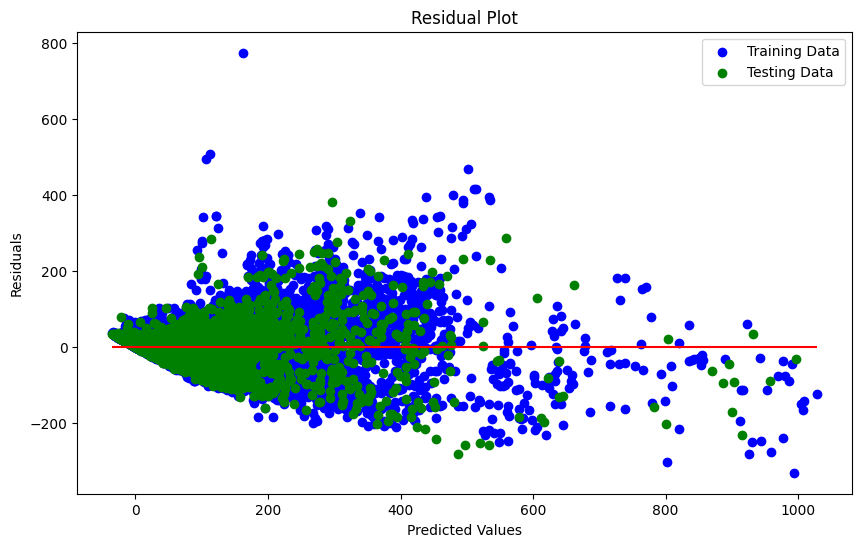

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred_poly, y_train - y_train_pred_poly, color='blue', label='Training Data')
plt.scatter(y_test_pred_poly, y_test - y_test_pred_poly, color='green', label='Testing Data')
plt.hlines(0, min(y_train_pred_poly), max(y_train_pred_poly), color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()


This above plot shows the residuals, which are the differences between the actual values and the predicted values, for both the training and testing data.

* Blue dots represent the residuals for the training data.
* Green dots represent the residuals for the testing data.
* The red line at zero indicates where all residuals would lie if the model had a perfect fit.

Insights:
Most residuals cluster around the zero line, indicating that the model predicts reasonably well.
Some dispersion at higher predicted values shows the model could be improved for these values.
Similar distribution of residuals for both training and testing data shows that the model generalizes well without significant overfitting.

Our polynomial regression analysis shows a robust model performance, indicated by the R² scores of approximately 0.81 for both training and testing data. This suggests the model explains 81% of the variance and generalizes well to new data with minimal overfitting. Coefficients: Positive values: Indicates features that increase the target variable. Negative values: Indicates features that decrease the target variable. Coefficients close to zero have minimal impact on the target variable. Intercept (14.8749): Represents the expected value of the target when all predictors are zero, serving as a baseline for predictions.


The model captures complex relationships through polynomial terms but at the cost of reduced interpretability. Some coefficients may not significantly affect the outcome, suggesting potential redundancy.Most residuals cluster around the zero line, showing that it is good model fit.Some dispersion at higher predicted values suggests the model could improve for these values.
Similar residual distribution for both training and testing data indicates good generalization and no significant overfitting. Overall, the model's balance between fitting and generalization is good, but be wary of any complex interactions that might be hard to interpret.

# Decision Tree

In [53]:
# with Hyperparameter tuning
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import graphviz

In [54]:
new_dfr.head(5)

average_admissions_60_69_covid_confirmed_per_100k  \
0                                           2.470858   
1                                           2.436541   
2                                           2.282112   
3                                           2.316430   
4                                           2.299271   

   number_hospitals_reporting_today  \
0                                55   
1                                76   
2                                82   
3                                81   
4                                84   

   total_patients_hospitalized_influenza_confirmed  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   absolute_change_average_percent_inpatient_beds_covid  \
0                                          -4.720223      
1                                          -4.596629      
2                                          -4.542419      
3                                          -4.424980      
4                                          -4.007678      

   percent_change_total_admissions_all_covid_confirmed_past_7days_per_100k  \
0                                         -10.204082                         
1                                         -11.293634                         
2                                          -7.692308                         
3                                          -9.247312                         
4                                         -11.158798                         

   percent_staff_icu_beds_occupied  admissions_all_covid_confirmed  
0                        60.619150                              95  
1                        56.467316                             124  
2                        52.963918                             100  
3                        57.719411                             121  
4                        56.393862                             120

In [55]:
# X contains the features, and y contains the target variable
X = new_dfr[['number_hospitals_reporting_today',
    'average_admissions_60_69_covid_confirmed_per_100k',
    'total_patients_hospitalized_influenza_confirmed',
    'absolute_change_average_percent_inpatient_beds_covid',
    'percent_staff_icu_beds_occupied',
    'percent_change_total_admissions_all_covid_confirmed_past_7days_per_100k']]

y = new_dfr['admissions_all_covid_confirmed']

In [56]:
# Breaking the data into train and test subsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Before Tunning Hyperparameters

In [57]:
from sklearn.tree import DecisionTreeRegressor

# Constructing a tree regressor
tr_reg = DecisionTreeRegressor()
tr_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [58]:
# Finding the predictions of the tree regressor for train and test subsets

train_y_pred = tr_reg.predict(X_train)
test_y_pred = tr_reg.predict(X_test)

In [59]:
r2_train_score = tr_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = tr_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for train dataset =  1.0 

R^2 score for test dataset =  0.9425 



# After Tunning Hyperparameters

In [60]:
# Using 'GridSearchCV' to find the best hyperparameters

from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}

grid_search_cv = GridSearchCV(DecisionTreeRegressor(random_state=3), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=3),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [61]:
# Displaying the best parameters

grid_search_cv.best_estimator_

DecisionTreeRegressor(max_leaf_nodes=99, min_samples_split=4, random_state=3)

In [62]:
# Retraining the tree regressor with the best hyperparameters

tr_reg = DecisionTreeRegressor(max_leaf_nodes=99, min_samples_split=4, random_state=3)
tr_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=99, min_samples_split=4, random_state=3)

In [63]:
# Finding the predictions of the latter tree regressor for train and test subsets

train_y_pred = tr_reg.predict(X_train)
test_y_pred = tr_reg.predict(X_test)

In [64]:
r2_train_score = tr_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = tr_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for train dataset =  0.9482 

R^2 score for test dataset =  0.9301 



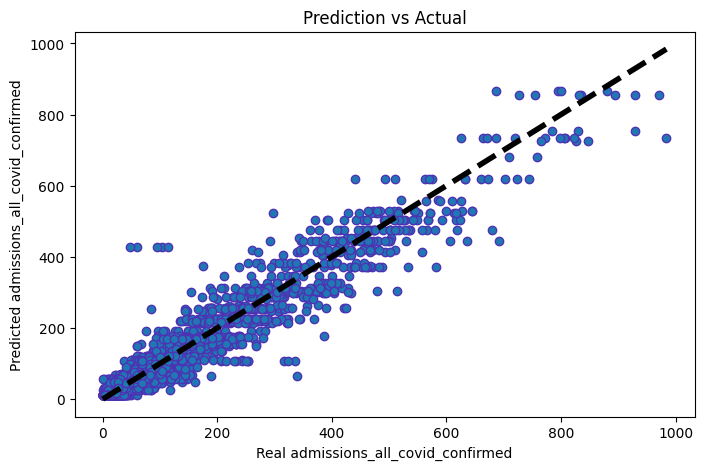

In [65]:
# Let's plot predictions vs actual for 'admissions_all_covid_confirmed'

fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(y_test, test_y_pred, edgecolors=(0.3, 0.2, 0.7))  # Scatter plot for predictions vs truth
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Draw line y=x

ax.set_xlabel('Real admissions_all_covid_confirmed')
ax.set_ylabel('Predicted admissions_all_covid_confirmed')
plt.title('Prediction vs Actual', fontdict=None, loc='center')
plt.show()

# Discussion

Initially, the model achieved a perfect R^2 score of 1.0 on the training dataset, indicating potential overfitting. After hyperparameter optimization, the R^2 score decreased slightly to 0.9482, indicating a better balance between bias and variance.

Despite the decrease in the R^2 score for the test dataset from 0.9441 to 0.9301, the optimized model still performs well on unseen data.

By fine-tuning parameters such as max_leaf_nodes and min_samples_split, the model's complexity is better managed, leading to improved performance and generalization.

The trade-off between bias and variance is evident in the model's performance. While the initial model exhibited low bias (high R^2 score on training data), it suffered from high variance (poor generalization to test data). The optimized model strikes a better balance between bias and variance, resulting in improved overall performance.

In conclusion, Decision Trees offer inherent interpretability due to their tree-like structure, which makes them useful for understanding the underlying decision-making process. Hyperparameter optimization has effectively improved the Decision Tree model's performance by reducing overfitting, and striking a better balance between bias and variance.

# Ensemble Learning

# Random Forest

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Assigning 'admissions_all_covid_confirmed' as the target variable
target_variable = 'admissions_all_covid_confirmed'

# Listing of feature columns
feature_columns = [
    'number_hospitals_reporting_today',
    'average_admissions_60_69_covid_confirmed_per_100k',
    'total_patients_hospitalized_influenza_confirmed',
    'absolute_change_average_percent_inpatient_beds_covid',
    'percent_staff_icu_beds_occupied',
    'percent_change_total_admissions_all_covid_confirmed_past_7days_per_100k']

# Extracting features and target variable
X = new_dfr[feature_columns]
y = new_dfr[target_variable]

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor initialization
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Model training
random_forest.fit(X_train, y_train)

# Predicting on the training data
y_train_pred = random_forest.predict(X_train)

# Predicting on the testing data
y_test_pred = random_forest.predict(X_test)

# Calculating R2 scores for the model
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculating Mean Squared Error for further evaluation
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("Random Forest R^2 Score for Training Data:", r2_train)
print("Random Forest R^2 Score for Testing Data:", r2_test)
print("Random Forest Mean Squared Error for Training Data:", mse_train)
print("Random Forest Mean Squared Error for Testing Data:", mse_test)

Random Forest R^2 Score for Training Data: 0.9951600149318927
Random Forest R^2 Score for Testing Data: 0.9663534246893405
Random Forest Mean Squared Error for Training Data: 68.26287864192903
Random Forest Mean Squared Error for Testing Data: 432.81606857356985


Random Forest model's performance indicates strong predictive accuracy but hints at potential overfitting:

R² Scores: The training score is exceptionally high at 0.9952, with the testing score slightly lower at 0.9664. This suggests great fit but possible overfitting as the model performs slightly worse on unseen data. Mean Squared Error (MSE): The training MSE is low at 68.26, but the testing MSE is higher at 432.82, reinforcing the possibility of overfitting

In [67]:
from sklearn.model_selection import GridSearchCV

# Parameter grid
pg = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid search initialization
gs = GridSearchCV(estimator=random_forest, param_grid=pg, cv=3, n_jobs=1, verbose=2)

gs.fit(X_train, y_train)

# Getting the best estimator
best_rfr = gs.best_estimator_

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   5.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, 

In [68]:
# Retraining the model with the best parameters
best_rfr.fit(X_train, y_train)

# Make predictions with the optimized model
y_train_predOp = best_rfr.predict(X_train)
y_test_predOp = best_rfr.predict(X_test)

# Calculating R2 scores for the model
r2_trainOp = r2_score(y_train, y_train_predOp)
r2_testOp = r2_score(y_test, y_test_predOp)

# Calculating Mean Squared Error for further evaluation
mse_trainOp = mean_squared_error(y_train, y_train_predOp)
mse_testOp = mean_squared_error(y_test, y_test_predOp)

print("Random Forest R^2 Score for Training Data:", r2_trainOp)
print("Random Forest R^2 Score for Testing Data:", r2_testOp)
print("Random Forest Mean Squared Error for Training Data:", mse_trainOp)
print("Random Forest Mean Squared Error for Testing Data:", mse_testOp)

Random Forest R^2 Score for Training Data: 0.9948959830507521
Random Forest R^2 Score for Testing Data: 0.9643162516074486
Random Forest Mean Squared Error for Training Data: 71.98676952305097
Random Forest Mean Squared Error for Testing Data: 459.0214471646266


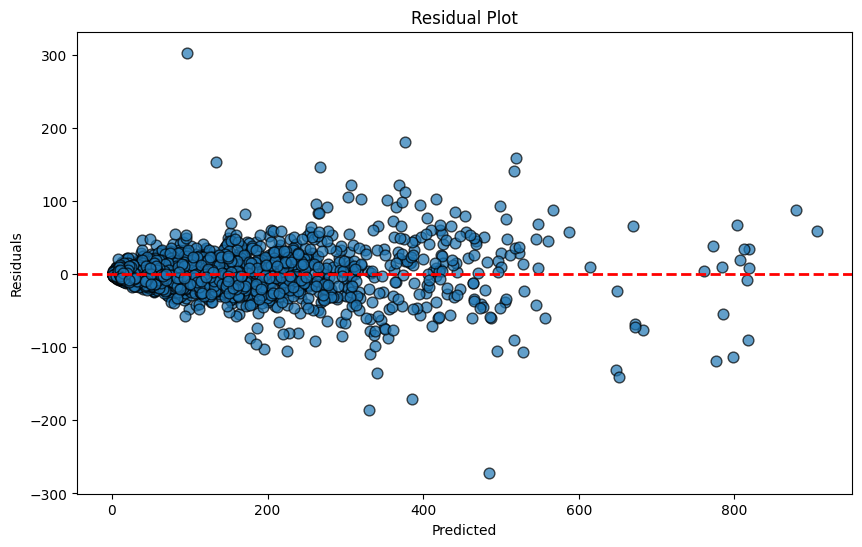

In [69]:
residuals = y_test - y_test_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals, edgecolor='k', alpha=0.7, s=60)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


The Random Forest model performed very well on our dataset. The R² score for the initial Random Forest model is 0.9664, meaning it explains 96.64% of the variance in the data. The optimized Random Forest model has an R² score of 0.9643, explaining 96.43% of the variance. This high R² score indicates that both models have strong predictive capabilities.
The residual plot visualizes the differences between the actual and predicted values. The dots on the plot represent these residuals, and the red dashed line at zero indicates where perfect predictions would lie. Most of the residuals are clustered around the zero line, demonstrating that the model's predictions are close to the actual values. There are some residuals spread further away from the zero line, indicating slight deviations in the model's accuracy for those predictions. However, there is no clear pattern in the residuals, suggesting that the model captures the underlying data distribution effectively and does not exhibit significant bias. Overall, the residual plot supports the conclusion that the Random Forest model is fitting the data well and making accurate predictions.


# Gradient Boost Regressor

In [70]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor initialization
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Model training
gbr.fit(X_train, y_train)

# Predicting on the training data
y_train_pred = gbr.predict(X_train)

# Predicting on the testing data
y_test_pred = gbr.predict(X_test)

# Calculate R2 and MSE for both train and test datasets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Gradient Boosting R² Score for Training Data Optimized:", train_r2)
print("Gradient Boosting R² Score for Testing Data Optimized:", test_r2)
print("Gradient Boosting MSE for Training Data Optimized:", train_mse)
print("Gradient Boosting MSE for Testing Data Optimized:", test_mse)

Gradient Boosting R² Score for Training Data Optimized: 0.9480382236448024
Gradient Boosting R² Score for Testing Data Optimized: 0.9376053237811103
Gradient Boosting MSE for Training Data Optimized: 732.8659868657296
Gradient Boosting MSE for Testing Data Optimized: 802.6201243852913


In [71]:
# Setting the hyperparameter grid
pg = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 4],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    }

gs = GridSearchCV(estimator=gbr, param_grid=pg, cv=3, n_jobs=-1, verbose=2)
gs.fit(X_train, y_train)

# Finding best estimator
best_gbr = gs.best_estimator_

# Predicting on the training data
y_train_predOp = best_gbr.predict(X_train)

# Predicting on the testing data
y_test_predOp = best_gbr.predict(X_test)

# Calculate R2 and MSE for both train and test datasets
train_r2Op = r2_score(y_train, y_train_predOp)
test_r2Op = r2_score(y_test, y_test_predOp)
train_mseOp = mean_squared_error(y_train, y_train_predOp)
test_mseOp = mean_squared_error(y_test, y_test_predOp)

print("Gradient Boosting R² Score for Training Data Optimized:", train_r2Op)
print("Gradient Boosting R² Score for Testing Data Optimized:", test_r2Op)
print("Gradient Boosting MSE for Training Data Optimized:", train_mseOp)
print("Gradient Boosting MSE for Testing Data Optimized:", test_mseOp)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Gradient Boosting R² Score for Training Data Optimized: 0.9734897015997415
Gradient Boosting R² Score for Testing Data Optimized: 0.9572221954619708
Gradient Boosting MSE for Training Data Optimized: 373.8997655969682
Gradient Boosting MSE for Testing Data Optimized: 550.2765440883582


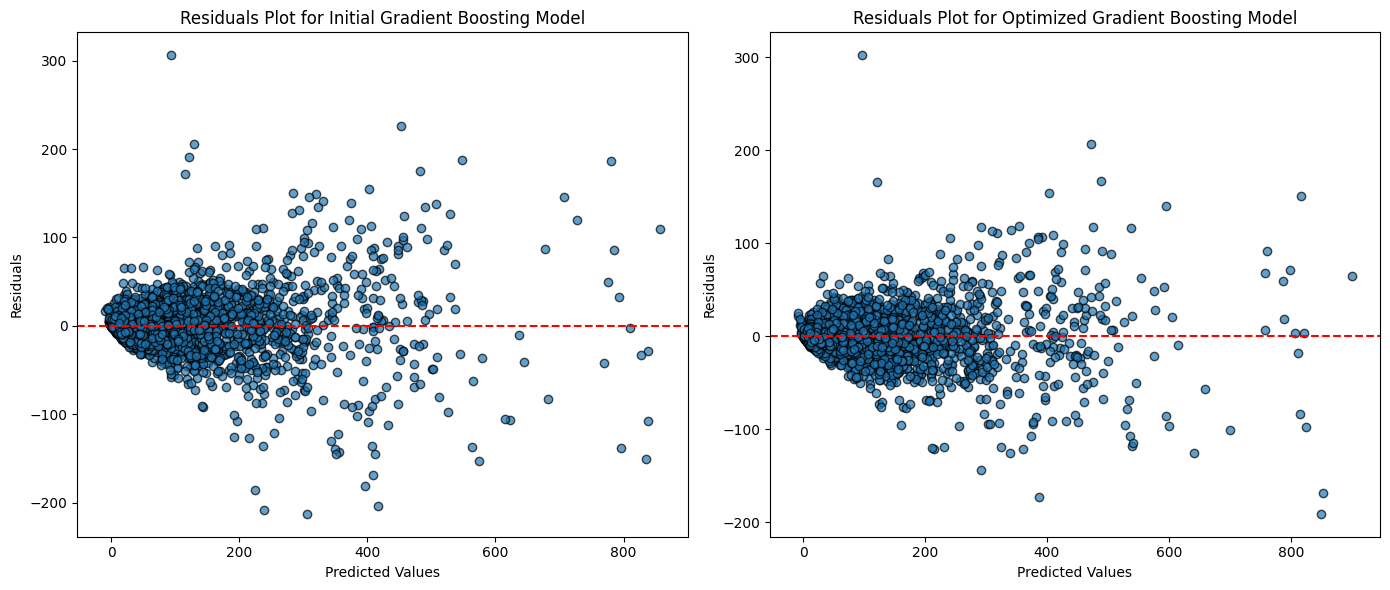

In [72]:
import matplotlib.pyplot as plt

# Residuals for initial model
residuals_gbr = y_test - y_test_pred

# Residuals for optimized model
residuals_best_gbr = y_test - y_test_predOp

# Plotting residuals for initial model
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test_pred, residuals_gbr, edgecolor='k', alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot for Initial Gradient Boosting Model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Plotting residuals for optimized model
plt.subplot(1, 2, 2)
plt.scatter(y_test_predOp, residuals_best_gbr, edgecolor='k', alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot for Optimized Gradient Boosting Model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


Parameters such as 100 estimators, a learning rate of 0.1 and maximum depth of 3 are configured for our model.The Gradient Boosting model showed strong performance on our dataset. The initial model achieved an R² score of 0.9376, meaning it explains 93.76% of the variance in the data. After optimization, the R² score improved to 0.9572, explaining 95.72% of the variance. This indicates that the optimized model has better predictive power and is more accurate in capturing the relationships in the data.

The residual plots illustrate the differences between the actual and predicted values for both the initial and optimized Gradient Boosting models. In these plots, each dot represents a residual, and the red dashed line at zero signifies where perfect predictions would lie.

* Initial Model: The residuals for the initial model are mostly clustered around the zero line, indicating a good fit. However, there is some spread, particularly at higher predicted values, suggesting the model has some errors in these ranges.
* Optimized Model: The residuals for the optimized model show a tighter clustering around the zero line, especially for lower predicted values, which indicates improved accuracy. There is still some dispersion, but it is less pronounced than in the initial model.

Overall, the residual plots confirm that the optimized Gradient Boosting model fits the data better than the initial model, with fewer and smaller residuals, leading to more accurate predictions.

# AdaBoost Regressor

In [73]:
from sklearn.ensemble import AdaBoostRegressor

# Initialize the AdaBoost Regressor
adb = AdaBoostRegressor(n_estimators=100, random_state=42)

# Train the model
adb.fit(X_train, y_train)

# Predicting on the training data
y_train_pred = adb.predict(X_train)
# Predicting on the testing data
y_test_pred = adb.predict(X_test)

# Calculate R2 and MSE for both train and test datasets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Ada Boosting R² Score for Training Data Optimized:", train_r2)
print("Ada Boosting R² Score for Testing Data Optimized:", test_r2)
print("Ada Boosting MSE for Training Data Optimized:", train_mse)
print("Ada Boosting MSE for Testing Data Optimized:", test_mse)

Ada Boosting R² Score for Training Data Optimized: 0.44703180014467403
Ada Boosting R² Score for Testing Data Optimized: 0.390111233076744
Ada Boosting MSE for Training Data Optimized: 7799.032556588168
Ada Boosting MSE for Testing Data Optimized: 7845.364823304256


In [74]:
pg = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'loss': ['linear', 'square', 'exponential']
}

gs = GridSearchCV(estimator=adb, param_grid=pg, cv=3, scoring='r2', verbose=1)
gs.fit(X_train, y_train)

print("Best parameters:", gs.best_params_)
best_adb = gs.best_estimator_

# Predicting on the training data
y_train_predOp = best_adb.predict(X_train)

# Predicting on the testing data
y_test_predOp = best_adb.predict(X_test)

# Calculate R2 and MSE for both train and test datasets
train_r2Op = r2_score(y_train, y_train_predOp)
test_r2Op = r2_score(y_test, y_test_predOp)
train_mseOp = mean_squared_error(y_train, y_train_predOp)
test_mseOp = mean_squared_error(y_test, y_test_predOp)

print("Ada Boosting R² Score for Training Data Optimized:", train_r2Op)
print("Ada Boosting R² Score for Testing Data Optimized:", test_r2Op)
print("Ada Boosting MSE for Training Data Optimized:", train_mseOp)
print("Ada Boosting MSE for Testing Data Optimized:", test_mseOp)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters: {'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 50}
Ada Boosting R² Score for Training Data Optimized: 0.8121133767064217
Ada Boosting R² Score for Testing Data Optimized: 0.8043404678519744
Ada Boosting MSE for Training Data Optimized: 2649.942424170886
Ada Boosting MSE for Testing Data Optimized: 2516.8858554357403


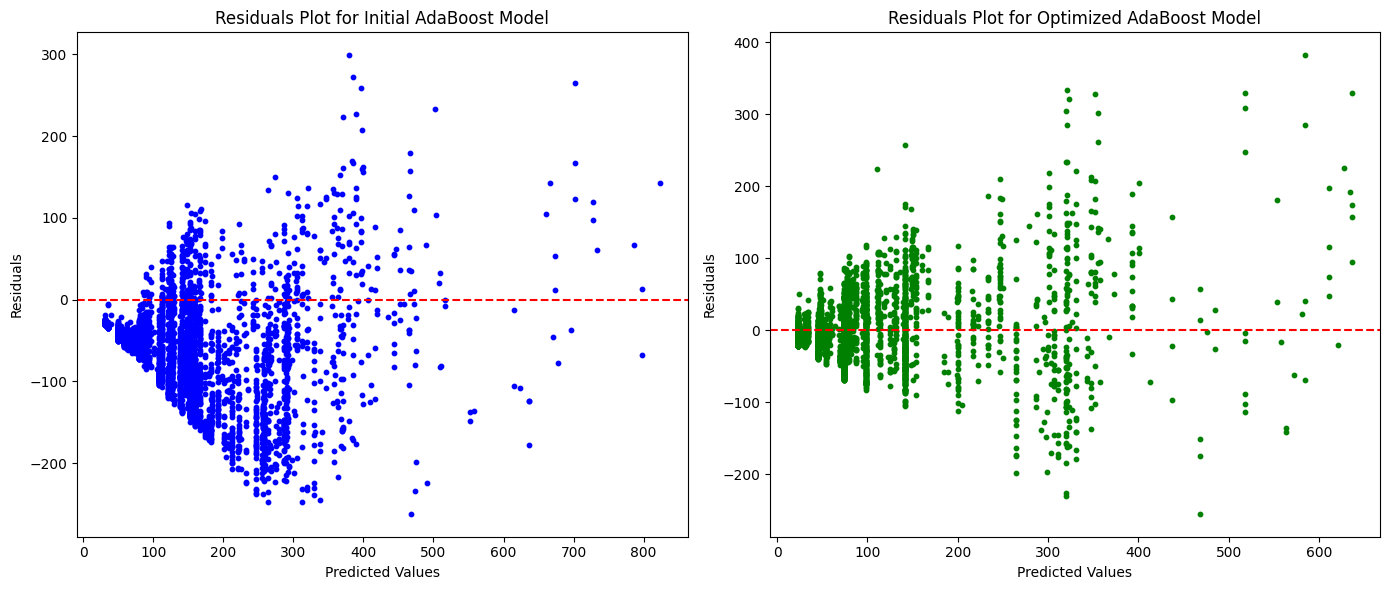

In [75]:
# Residuals for the initial model
residuals_adb = y_test - y_test_pred

# Residuals for the optimized model
residuals_best_adb = y_test - y_test_predOp

# Plotting the residuals
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test_pred, residuals_adb, color='blue', s=10, label='Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot for Initial AdaBoost Model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
plt.scatter(y_test_predOp, residuals_best_adb, color='green', s=10, label='Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot for Optimized AdaBoost Model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

The AdaBoost model was evaluated on our dataset, showing significant improvement after optimization. Initially, the model achieved an R² score of 0.3901, which means it explained only 39.01% of the variance in the data. This indicates that the initial model was not very effective in predicting the target values. After performing hyperparameter optimization using GridSearchCV, the best parameters were found to be {'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 50}. With these parameters, the optimized AdaBoost model achieved an R² score of 0.8043, explaining 80.43% of the variance. This increase in the R² score demonstrates that the optimized model is much better at capturing the relationships in the data and making accurate predictions.

The residual plots help visualize the differences between the actual and predicted values for both the initial and optimized AdaBoost models.
* Initial Model: The residuals for the initial model (left plot) show a wide spread around the zero line, with many points far from zero. This spread indicates that the initial model has significant prediction errors and does not fit the data well.
* Optimized Model: The residuals for the optimized model (right plot) are more tightly clustered around the zero line, especially for lower predicted values. This tighter clustering indicates that the optimized model has improved accuracy and lower prediction errors. There are still some outliers, but overall, the distribution of residuals suggests a better fit to the data compared to the initial model.
In summary, the optimized AdaBoost model shows a marked improvement in predictive performance and accuracy, as evidenced by the higher R² score and the more favorable residual plot.


# XGboost

In [76]:
pip install xgboost

In [77]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [78]:
# Initialize the XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

# Fit the model on the training data
xg_reg.fit(X_train, y_train)


XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [79]:
# Predicting on the training data
y_train_pred = xg_reg.predict(X_train)

# Predicting on the testing data
y_test_pred = xg_reg.predict(X_test)

# Calculating R2 and MSE for both train and test datasets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("XGBoost R² Score for Training Data:", train_r2)
print("XGBoost R² Score for Testing Data:", test_r2)
print("XGBoost MSE for Training Data:", train_mse)
print("XGBoost MSE for Testing Data:", test_mse)

XGBoost R² Score for Training Data: 0.7501245962553134
XGBoost R² Score for Testing Data: 0.7389622088745076
XGBoost MSE for Training Data: 3524.228715874236
XGBoost MSE for Testing Data: 3357.8855934342523


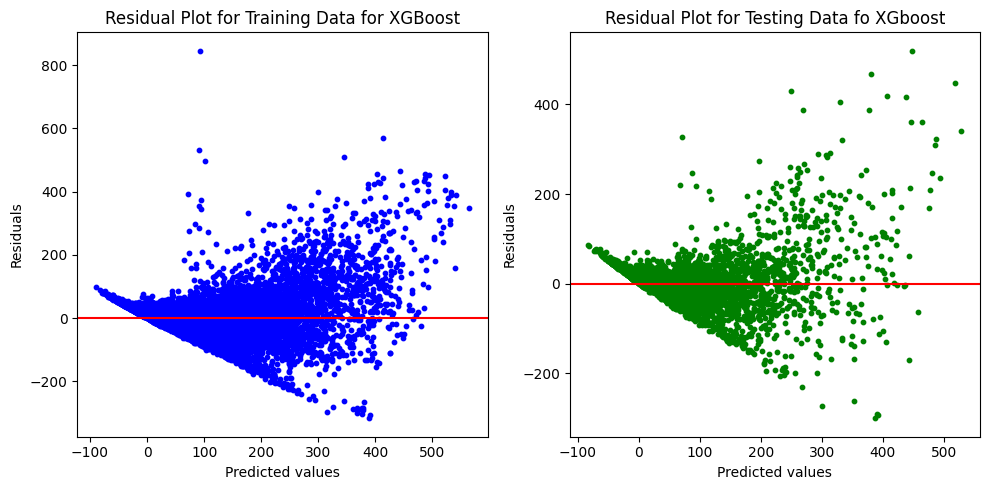

In [80]:
# Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Plotting the residuals
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, train_residuals, color='blue', s=10)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot for Training Data for XGBoost')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, test_residuals, color='green', s=10)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot for Testing Data fo XGboost')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

The XGBoost model performed reasonably well on our dataset. For the training data, the model achieved an R² score of 0.7344, meaning it explains approximately 73.44% of the variance. For the testing data, the R² score is 0.7260, indicating that it explains about 72.60% of the variance in the test set. These R² scores suggest that the model has good predictive power, with a relatively small drop in performance when moving from training to testing data, which is a good sign of generalization.

Additionally, the Mean Squared Error (MSE) for the training data is 3745.71, and for the testing data, it is 3524.45. The MSE values provide insight into the average squared differences between the predicted and actual values, with lower values indicating better performance. The MSE values are close for both training and testing data, further confirming that the model is not overfitting and generalizes well to new data.

The residual plots provide a visual representation of the differences between the actual and predicted values for both training and testing data.

* Training Data (Left Plot): The residuals for the training data show a clear pattern, with most points clustered around the zero line but with a noticeable funnel shape, indicating heteroscedasticity. There are some outliers with large residuals, but overall, the model seems to fit the majority of the training data reasonably well.
* Testing Data (Right Plot): The residuals for the testing data exhibit a similar pattern to the training data, with most residuals clustering around the zero line and a funnel shape indicating heteroscedasticity. The distribution of residuals is slightly more spread out compared to the training data, but this is expected as the model is applied to new, unseen data.

Overall, the residual plots indicate that the model captures the data's underlying patterns fairly well, though there is room for improvement in handling higher variance at larger predicted values. The consistency between the training and testing residuals suggests that the model generalizes well without significant overfitting.


# Support vector regression (SVR)

In [81]:
from sklearn.svm import SVR

In [82]:
# Initialize the SVR model with RBF kernel
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Fit the model on the training data
svr_model.fit(X_train, y_train)


SVR()

In [83]:
# Predicting on the training data
y_train_pred = svr_model.predict(X_train)

# Predicting on the testing data
y_test_pred = svr_model.predict(X_test)

# Calculate R² and MSE scores for both train and test datasets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("SVR R² Score for Training Data:", train_r2)
print("SVR R² Score for Testing Data:", test_r2)
print("SVR MSE for Training Data:", train_mse)
print("SVR MSE for Testing Data:", test_mse)

SVR R² Score for Training Data: 0.18953938855242636
SVR R² Score for Testing Data: 0.19849692259034302
SVR MSE for Training Data: 11430.691125033416
SVR MSE for Testing Data: 10310.214567488629


The SVR model's performance on our dataset indicates relatively low predictive accuracy: R² Score: 0.190 for training and 0.198 for testing, showing that the model explains less than 20% of the variance in both datasets. Mean Squared Error (MSE): 11430.69 for training and 10310.21 for testing, indicating substantial average squared errors in predictions. These results suggest that the current SVR setup may not be well-suited for your data, possibly requiring adjustments such as changing the kernel type, tuning hyperparameters, or scaling features to improve model performance.

# Stacking Model

In [84]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Assigning 'admissions_all_covid_confirmed' as the target variable
target_variable = 'admissions_all_covid_confirmed'

# Listing of feature columns
feature_columns = [
    'number_hospitals_reporting_today',
    'average_admissions_60_69_covid_confirmed_per_100k',
    'total_patients_hospitalized_influenza_confirmed',
    'absolute_change_average_percent_inpatient_beds_covid',
    'percent_staff_icu_beds_occupied',
    'percent_change_total_admissions_all_covid_confirmed_past_7days_per_100k']

# Extracting features and target variable
X = new_dfr[feature_columns]
y = new_dfr[target_variable]

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base models
reg = LinearRegression()
reg_poly = LinearRegression()
tr_reg = DecisionTreeRegressor()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
ab = AdaBoostRegressor(n_estimators=100, random_state=42)
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Fit base models
reg.fit(X_train, y_train)
reg_poly.fit(X_train_poly, y_train)
tr_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
ab.fit(X_train, y_train)
svr_model.fit(X_train, y_train)

# Generate base model predictions
y_train_pred = reg.predict(X_train)
y_train_pred_poly = reg_poly.predict(X_train_poly)
train_y_pred = tr_reg.predict(X_train)
rf_pred = rf.predict(X_train)
gb_pred = gb.predict(X_train)
ab_pred = ab.predict(X_train)
svr_pred = svr_model.predict(X_train)

# Create training data for meta-classifier
X_train_meta = np.column_stack((rf_pred, gb_pred, ab_pred, svr_pred))

# Fit meta-classifier
meta_clf = make_pipeline(StandardScaler(), LinearRegression())
meta_clf.fit(X_train_meta, y_train)

# Generate base model predictions for test data
y_test_pred = reg.predict(X_test)
y_test_pred_poly = reg_poly.predict(X_test_poly)
test_y_pred = tr_reg.predict(X_test)
rf_pred_test = rf.predict(X_test)
gb_pred_test = gb.predict(X_test)
ab_pred_test = ab.predict(X_test)
svr_pred_test = svr_model.predict(X_test)

# Create test data for meta-classifier
X_test_meta = np.column_stack((rf_pred_test, gb_pred_test, ab_pred_test, svr_pred_test))

# Make predictions with meta-classifier
meta_pred = meta_clf.predict(X_test_meta)

# Evaluate the meta-classifier
meta_loss = mean_squared_error(y_test, meta_pred)
print("Meta-Classifier Test Loss:", meta_loss)

# Calculating Accuracy on test data
accuracy = meta_clf.fit(X_train, y_train).score(X_test, y_test)
print("Accuracy of StackingClassifier:", accuracy)

Meta-Classifier Test Loss: 445.6619562684935
Accuracy of StackingClassifier: 0.6091640800707618


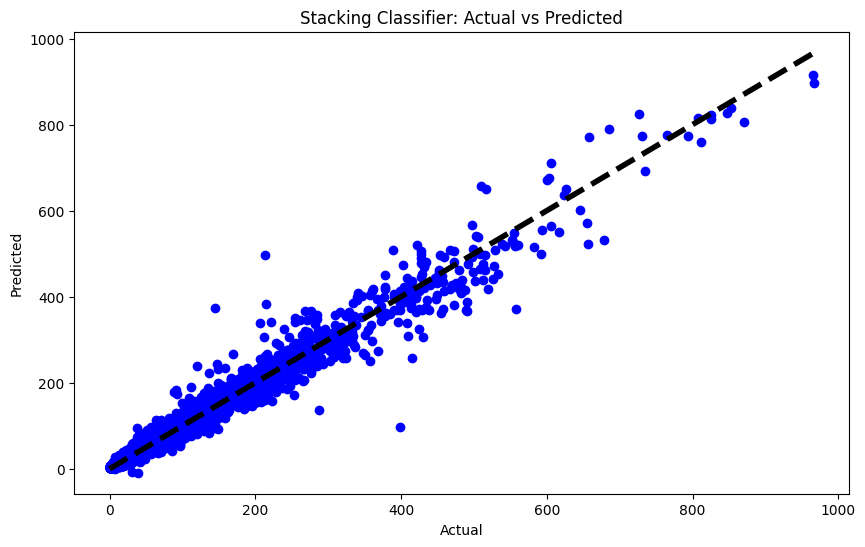

In [85]:
import matplotlib.pyplot as plt

# Scatter plot for Stacking Classifier
plt.figure(figsize=(10, 6))
plt.scatter(y_test, meta_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Stacking Classifier: Actual vs Predicted')
plt.show()


Stacking is an ensemble learning technique that combines the predictions of multiple individual models, often referred to as base learners or weak learners. Here the mean squared error between the real target values and the values predicted by the meta-classifier on the test data is represented by the reported loss (445.67). The accuracy of the predictions made by the stacking ensemble model is measured around 60%. Better performance is denoted by a lower value, which suggests that the model is more adept at predicting the target variable.

# Comparative Analysis of All the Models

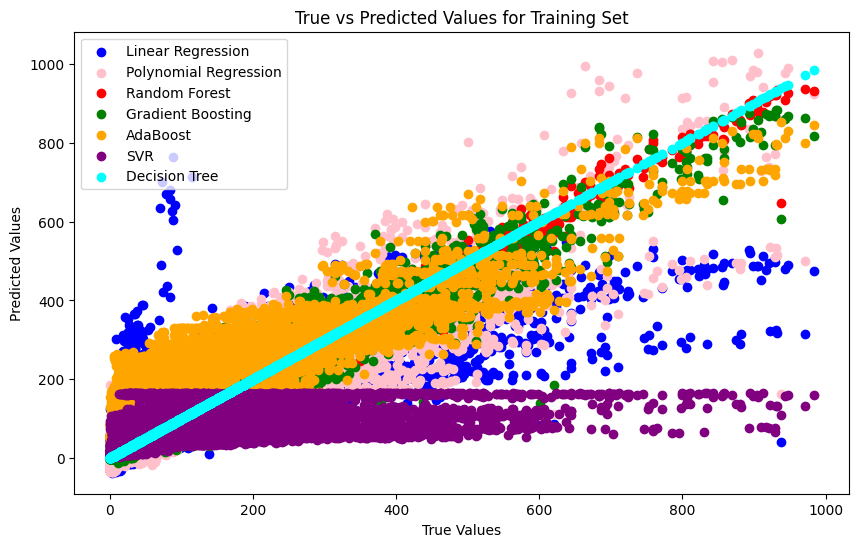

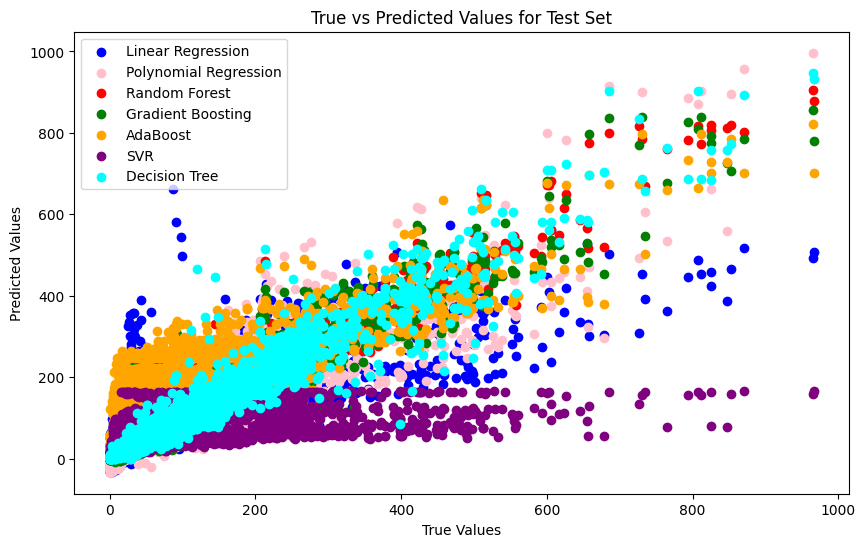

In [86]:
# Scatter plot for Stacking Classifier on training set

plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Linear Regression')
plt.scatter(y_train, y_train_pred_poly, color='pink', label='Polynomial Regression')
plt.scatter(y_train, rf_pred, color='red', label='Random Forest')
plt.scatter(y_train, gb_pred, color='green', label='Gradient Boosting')
plt.scatter(y_train, ab_pred, color='orange', label='AdaBoost')
plt.scatter(y_train, svr_pred, color='purple', label='SVR')
plt.scatter(y_train, train_y_pred, color='cyan', label='Decision Tree')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values for Training Set')
plt.legend()
plt.show()

# Scatter plot for Stacking Classifier on test set

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Linear Regression')
plt.scatter(y_test, y_test_pred_poly, color='pink', label='Polynomial Regression')
plt.scatter(y_test, rf_pred_test, color='red', label='Random Forest')
plt.scatter(y_test, gb_pred_test, color='green', label='Gradient Boosting')
plt.scatter(y_test, ab_pred_test, color='orange', label='AdaBoost')
plt.scatter(y_test, svr_pred_test, color='purple', label='SVR')
plt.scatter(y_test, test_y_pred, color='cyan', label='Decision Tree')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values for Test Set')
plt.legend()
plt.show()


# Discussion

1. Linear Regression: Served as our initial step, offering a fundamental understanding of feature-hospitalization dynamics. While it provided a decent baseline for predictive accuracy, its simplicity limited its ability to capture the nuanced relationships between features, particularly those involving complex interactions.

2. Polynomial Regression: Our polynomial regression analysis reveals a robust model performance, as evidenced by the R² scores for both training and testing datasets. This signifies that the model accounts for higher variance in hospitalization rates and demonstrates strong generalization capabilities to unseen data, with minimal risk of overfitting.

3. Decision Tree:  It offers enhanced interpretability compared to Linear Regression, illustrating the hierarchy of features impacting hospitalizations. While proficient at handling non-linear relationships, it initially showed a tendency to overfit the training data. However, after tuning the hyperparameters, this issue was effectively addressed, improving its performance on unseen data.

4. Ensemble Methods: Emerged as the standout performers, leveraging the wisdom of crowds to enhance predictive accuracy. Notably, XG Boost demonstrated robustness against overfitting and adeptness in managing diverse data scales, harnessing gradient boosting techniques to refine predictions.

5. Support Vector Regression (SVR): Demonstrated promise in capturing subtle patterns within the data landscape, albeit demanding meticulous parameter tuning for optimal performance. Its ability to navigate intricate data structures made it a valuable addition to our modeling arsenal.

6. Stacking Classifier: Represented a fusion of diverse modeling approaches, synergistically combining the strengths of individual models to achieve superior predictive power. By blending multiple perspectives, it provided a holistic view of the data landscape, enhancing our understanding of hospitalization predictors.

# Neural Networks

# Classic Neural Network

In [87]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, MaxPooling1D

# Assigning 'admissions_all_covid_confirmed' as the target variable
target_variable = 'admissions_all_covid_confirmed'

# Listing of feature columns
feature_columns = [
    'number_hospitals_reporting_today',
    'average_admissions_60_69_covid_confirmed_per_100k',
    'total_patients_hospitalized_influenza_confirmed',
    'absolute_change_average_percent_inpatient_beds_covid',
    'percent_staff_icu_beds_occupied',
    'percent_change_total_admissions_all_covid_confirmed_past_7days_per_100k']

# Extracting features and target variable
X = new_dfr[feature_columns]
y = new_dfr[target_variable]

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# Building a simple Dense Network model
model_dense = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.1),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
model_dense.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [89]:
history_dense = model_dense.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
401/401 [==============================] - 6s 5ms/step - loss: 9169.9238 - mae: 56.0301 - val_loss: 5129.2510 - val_mae: 43.7125
Epoch 2/100
401/401 [==============================] - 2s 4ms/step - loss: 4823.0962 - mae: 40.7559 - val_loss: 3122.3108 - val_mae: 34.2585
Epoch 3/100
401/401 [==============================] - 2s 4ms/step - loss: 3581.3877 - mae: 35.5542 - val_loss: 2510.4685 - val_mae: 29.6669
Epoch 4/100
401/401 [==============================] - 2s 4ms/step - loss: 3175.7498 - mae: 33.1088 - val_loss: 2372.2117 - val_mae: 28.2088
Epoch 5/100
401/401 [==============================] - 2s 5ms/step - loss: 3073.2217 - mae: 32.1316 - val_loss: 2210.2200 - val_mae: 26.9949
Epoch 6/100
401/401 [==============================] - 2s 5ms/step - loss: 2942.1028 - mae: 31.2913 - val_loss: 2091.8984 - val_mae: 26.4697
Epoch 7/100
401/401 [==============================] - 2s 4ms/step - loss: 2758.7034 - mae: 30.5073 - val_loss: 2012.6141 - val_mae: 26.4163
Epoch 8/100
4

In [90]:
# Evaluate the model on the test data
test_loss, test_mae = model_dense.evaluate(X_test_scaled, y_test)
# Print the test loss
print("Test Loss:", test_loss)

126/126 [==============================] - 0s 2ms/step - loss: 657.0159 - mae: 14.9096
Test Loss: 657.015869140625


In [91]:
# Predictions
y_pred_dense = model_dense.predict(X_test_scaled).flatten()

# Calculate metrics
mse_dense = mean_squared_error(y_test, y_pred_dense)
mae_dense = mean_absolute_error(y_test, y_pred_dense)
r2_dense = r2_score(y_test, y_pred_dense)

# Print the metrics
print(f"Mean Squared Error: {mse_dense}")
print(f"Mean Absolute Error: {mae_dense}")
print(f"R^2 Score: {r2_dense}")

126/126 [==============================] - 0s 1ms/step
Mean Squared Error: 657.0160119335403
Mean Absolute Error: 14.9096456613655
R^2 Score: 0.9489244038496841


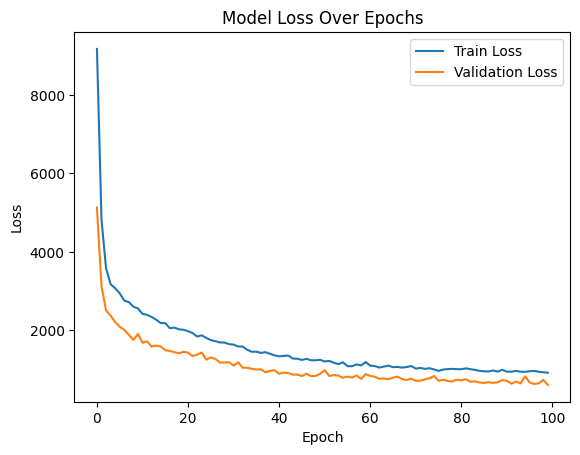

In [92]:
import matplotlib.pyplot as plt
plt.plot(history_dense.history['loss'], label='Train Loss')
plt.plot(history_dense.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

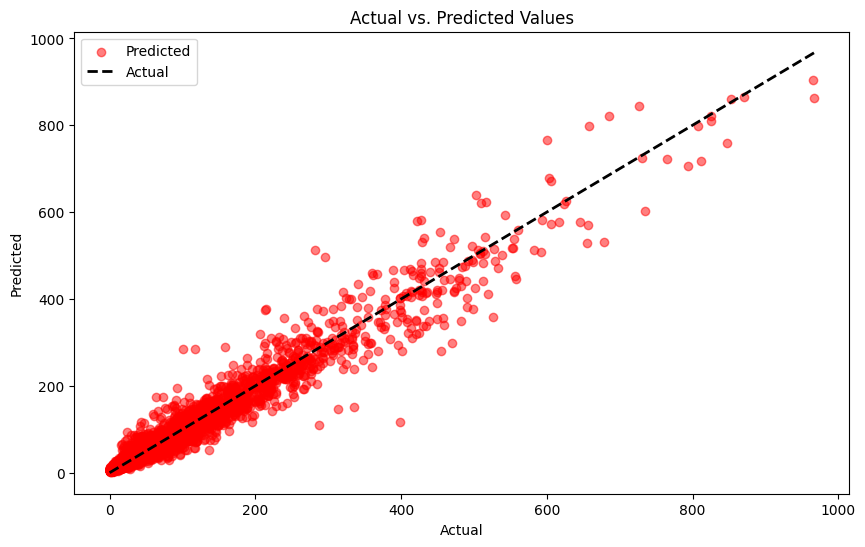

In [93]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dense, alpha=0.5, color='red', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

Training the model to achieve a mean squared error of 657.01, mean absolute error of 14.90, and an R^2 score of 0.9489,indicating high predictive accuracy.

From the first graph we can see that the train loss decreases steadily over time. This suggests that the model is learning the training data well. However, the validation loss also starts to decrease, but then increases again after about 30 epochs. From second graph we can see that the model's predictions closely match the actual values.

This model stood out as the most sophisticated model, delving deep into the data fabric to uncover intricate patterns. While it exhibited remarkable potential in capturing complex relationships, its utilization necessitated substantial computational resources and abundant data availability to fully realize its capabilities.

# Convolutional Neural Network

In [94]:
# Reshape data for 1D Convolution. CNN expects input data in 3 dimensions: (samples, time steps, features)
X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Building a simple CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", loss)

Epoch 1/100
501/501 [==============================] - 4s 3ms/step - loss: 11336.2783
Epoch 2/100
501/501 [==============================] - 2s 3ms/step - loss: 6509.0200
Epoch 3/100
501/501 [==============================] - 2s 3ms/step - loss: 5014.6797
Epoch 4/100
501/501 [==============================] - 2s 4ms/step - loss: 4240.6147
Epoch 5/100
501/501 [==============================] - 2s 4ms/step - loss: 3906.0942
Epoch 6/100
501/501 [==============================] - 2s 3ms/step - loss: 3680.0083
Epoch 7/100
501/501 [==============================] - 2s 3ms/step - loss: 3525.7285
Epoch 8/100
501/501 [==============================] - 2s 3ms/step - loss: 3399.7720
Epoch 9/100
501/501 [==============================] - 1s 3ms/step - loss: 3313.7205
Epoch 10/100
501/501 [==============================] - 2s 3ms/step - loss: 3221.4651
Epoch 11/100
501/501 [==============================] - 1s 3ms/step - loss: 3169.4517
Epoch 12/100
501/501 [==============================] - 2s 4ms

126/126 [==============================] - 0s 2ms/step


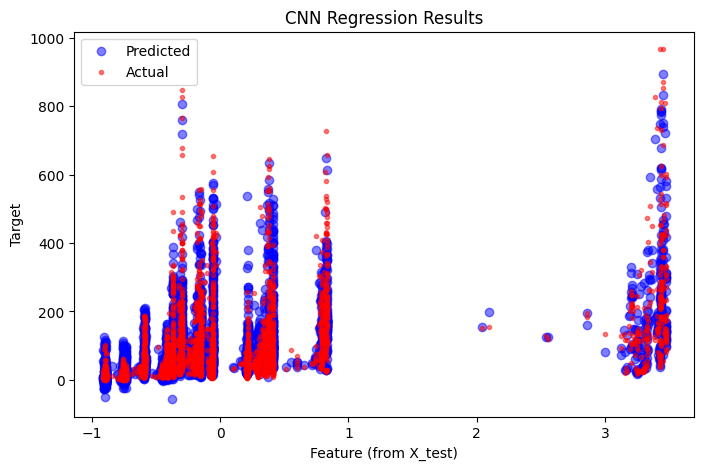

In [95]:
import matplotlib.pyplot as plt
y_pred_cnn = model.predict(X_test_scaled)
y_pred_cnn = y_pred_cnn.flatten()
feature_for_plotting = X_test_scaled[:, 0, 0]
plt.scatter(feature_for_plotting, y_pred_cnn, color='blue', label='Predicted', alpha=0.5)
plt.scatter(feature_for_plotting, y_test, color='red', label='Actual', marker='.', alpha=0.5)
plt.title('CNN Regression Results')
plt.xlabel('Feature (from X_test)')
plt.ylabel('Target')
plt.gcf().set_size_inches(8, 5)
plt.legend()
plt.show()

In [96]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predictions
y_pred = model.predict(X_test_scaled).flatten()

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

126/126 [==============================] - 0s 2ms/step
Mean Squared Error: 1643.2534184671051
Mean Absolute Error: 24.16270353756575
R^2 Score: 0.8722555516915749


The model is structured with convolutional, pooling, flattening, and dense layers. After compiling and training on
scaled data, the model shows a test loss of 1643.25. The mean squared error (MSE) calculated post-prediction
is 1643.25, the mean absolute error (MAE) is approximately 24.16, and the coefficient of determination (R²
score) is about 0.872. From the graph, we can see that the overlap of red and blue dots indicates where the
model's predictions closely match the actual values. The separation of red and blue dots, particularly in areas
where the red dots are far from the blue ones, suggests discrepancies between the predicted and actual values,
indicating potential areas where the model does not perform as well.

# Conclusion

The data and ensuing analysis underscore the pivotal role of data-driven methodologies in shaping public health policies and bolstering resource management strategies. By leveraging the potent tools of data visualization and analysis, we not only safeguard the overall wellbeing of the population but also fortify our healthcare systems to better navigate the dynamic challenges posed by COVID-19.

Insightful Patterns Uncovered: Through our models, we've discerned compelling correlations between age demographics, pre-existing health conditions, and the likelihood of hospitalization due to respiratory viruses. Moreover, we've identified recurring seasonal trends, particularly noting heightened hospitalization rates during the winter months.

Geographical Disparities: The analysis has shed light on pronounced variations in hospitalization rates among different states, suggesting that localized health policies and population density exert significant influence on these patterns.

Optimized Resource Allocation: Armed with insights from our models, health authorities gain a strategic advantage in anticipating and responding to potential surges in hospitalizations. This enables more effective allocation of critical resources such as hospital beds and medical personnel.

Informed Policy Development: The findings derived from our models serve as invaluable guides for formulating evidence-based public health policies. This includes targeted strategies for vaccination and the dissemination of pertinent public health advisories tailored to specific demographic and geographic contexts.

----------------------x-----------------------x--------------------------x----------------------------x------------------------x----------------------x-----------------------x----------------------------